# Synthetic Data Evaluation TVAE

NCDB

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis
import scipy.stats as stats

import sdv
from sdv.tabular import CTGAN, GaussianCopula, CopulaGAN, TVAE
from sdv.evaluation import evaluate
from table_evaluator import TableEvaluator
import sweetviz as sv
import torch
import pickle
import io


import sys
import os
sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('../src'))
from auxiliar.Constants import field_types, field_transformers
from auxiliar.metadata import metadata, table_metadata
from auxiliar.aux_func import qqploter, var_comparative, get_deviation_of_mean_perc, histogram_wo_outliers


import warnings
warnings.filterwarnings('ignore')

{'tables': {'ncbd': {'fields': {'year': {'type': 'numerical', 'subtype': 'integer', 'transformer': 'integer'}, 'quarter': {'type': 'categorical', 'transformer': None}, 'weekday': {'type': 'categorical', 'transformer': None}, 'hour': {'type': 'categorical', 'transformer': 'categorical_fuzzy'}, 'vehicles_involved': {'type': 'numerical', 'subtype': 'integer', 'transformer': 'integer'}, 'crash_type': {'type': 'categorical', 'transformer': 'categorical_fuzzy'}, 'crash_place': {'type': 'categorical', 'transformer': 'categorical_fuzzy'}, 'crash_weather': {'type': 'categorical', 'transformer': 'categorical_fuzzy'}, 'surface_state': {'type': 'categorical', 'transformer': 'categorical_fuzzy'}, 'road_slope': {'type': 'categorical', 'transformer': 'categorical_fuzzy'}, 'traffic_state': {'type': 'categorical', 'transformer': 'categorical_fuzzy'}, 'vehicle_type': {'type': 'categorical', 'transformer': 'categorical_fuzzy'}, 'vehicle_age': {'type': 'numerical', 'subtype': 'integer', 'transformer': 'in

In [2]:
train = pd.read_parquet("../data/interim/train.parquet")
test = pd.read_parquet("../data/interim/test.parquet")

In [3]:
# Real and synthetic data
generator = CTGAN.load('../models/tvae.pkl') 

In [11]:
#%%time
#np.random.seed(2022)
#synthetic_data = generator.sample(len(train)*2)
##save data
#synthetic_data.to_parquet('../data/synth/synth_tvae.parquet', index=False)

CPU times: user 5min 25s, sys: 8.98 s, total: 5min 34s
Wall time: 2min 25s


In [4]:
#load data
synthetic_data = pd.read_parquet('../data/synth/synth_tvae.parquet')

## Train Test Comparison

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)



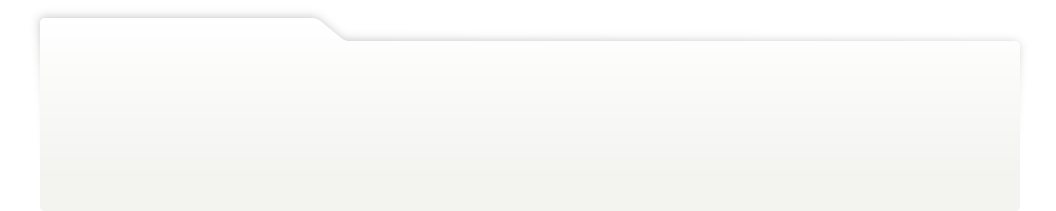
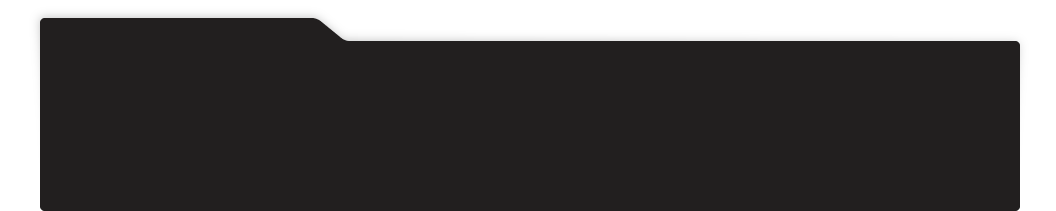
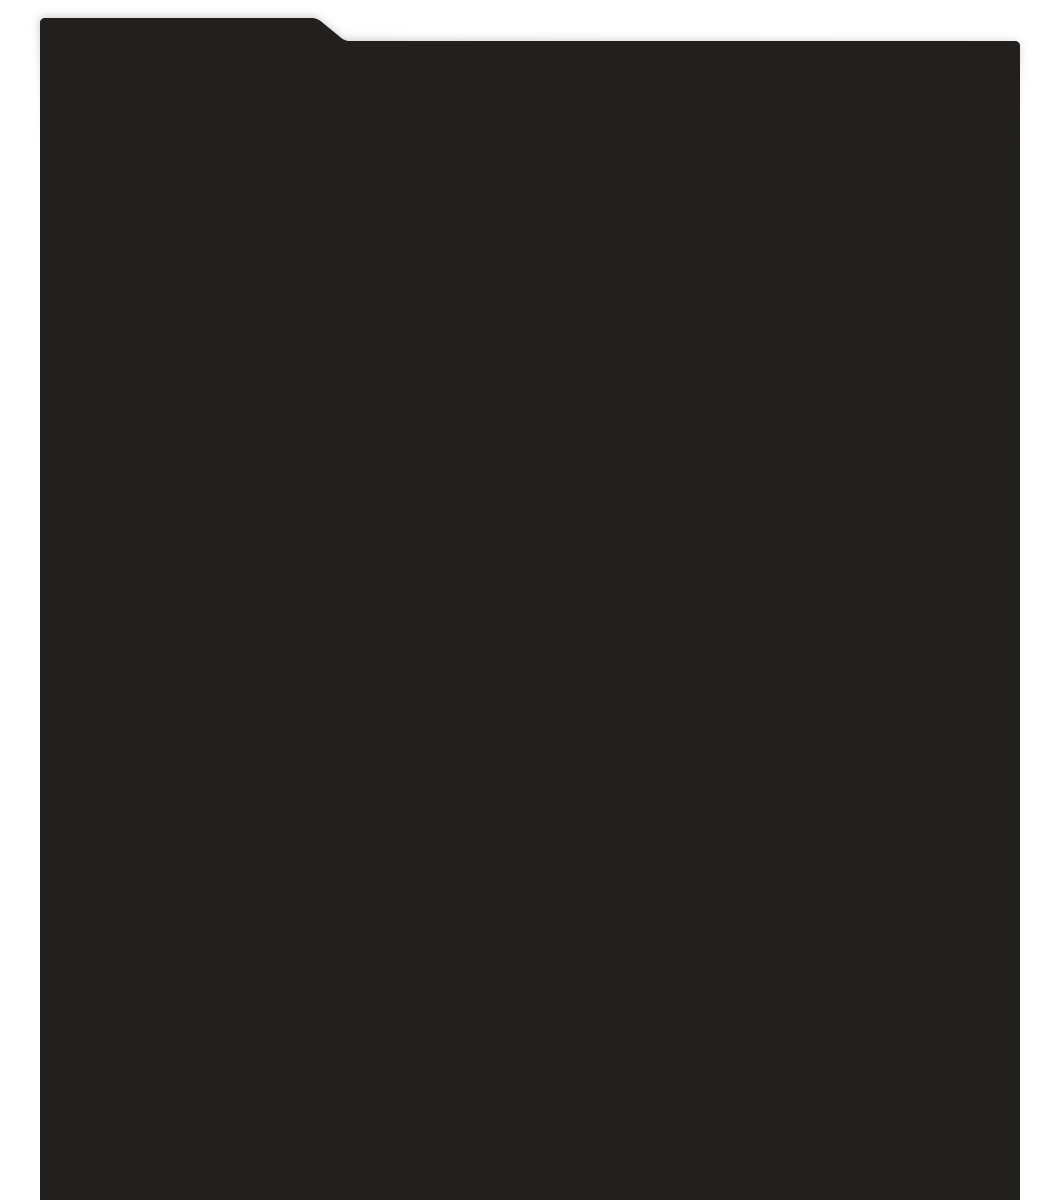
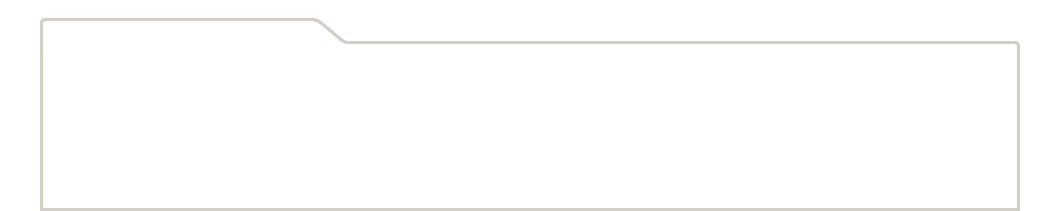
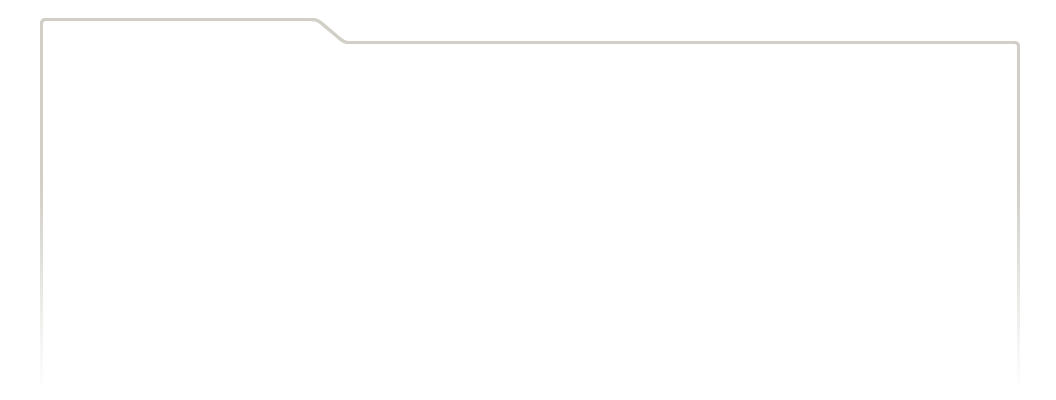
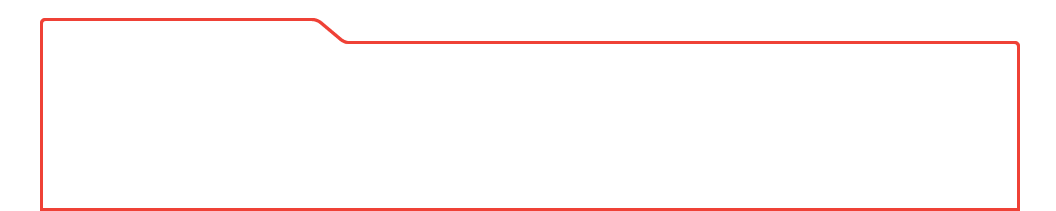
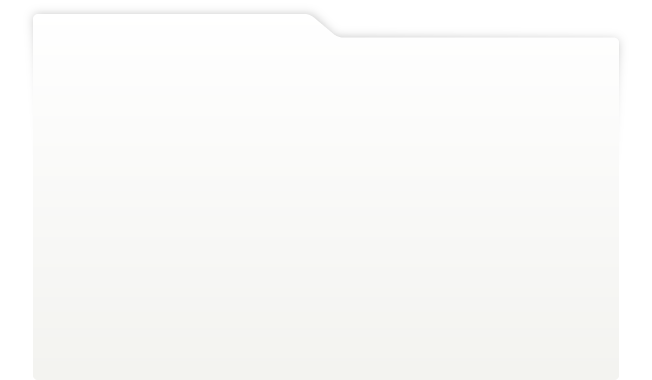
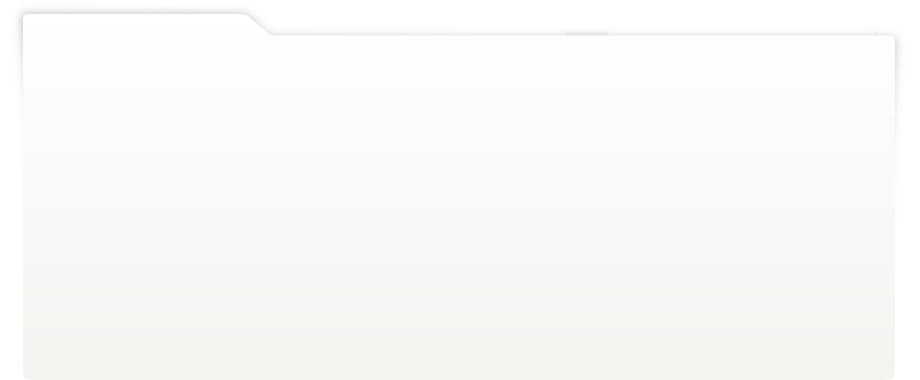
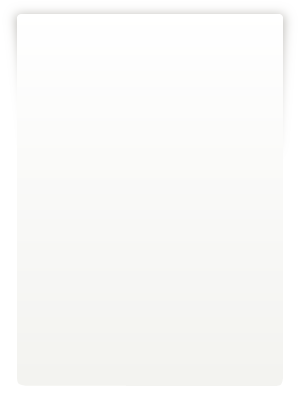
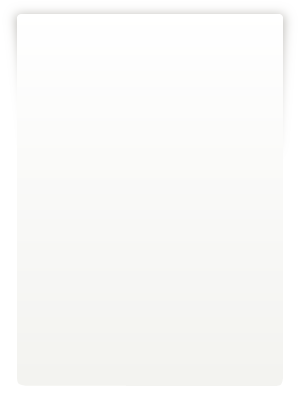
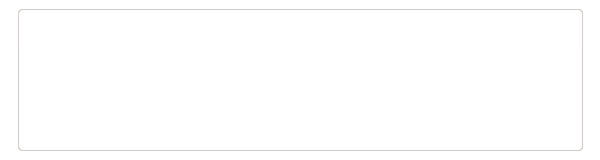
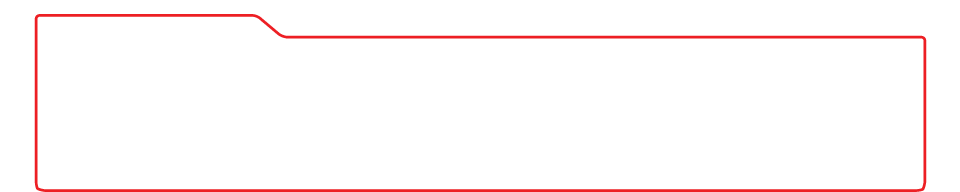
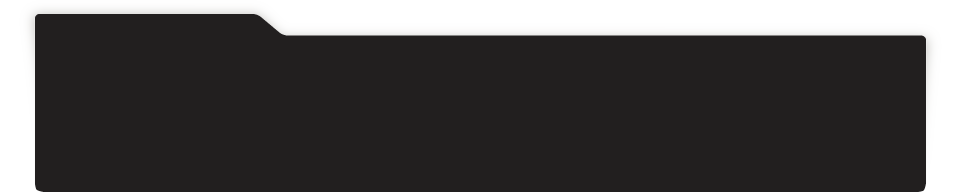
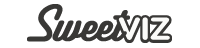
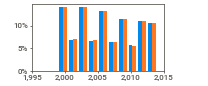
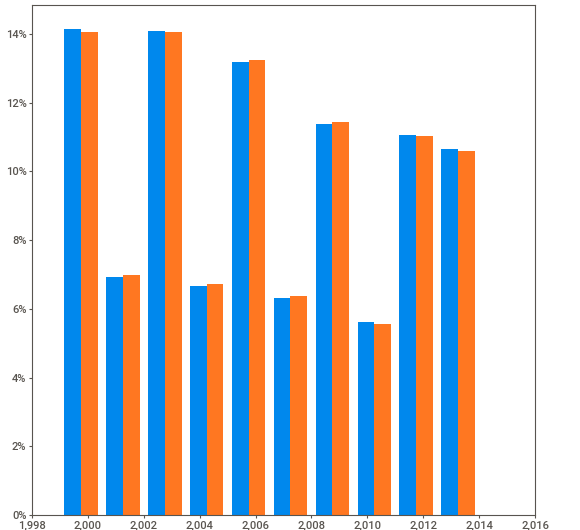
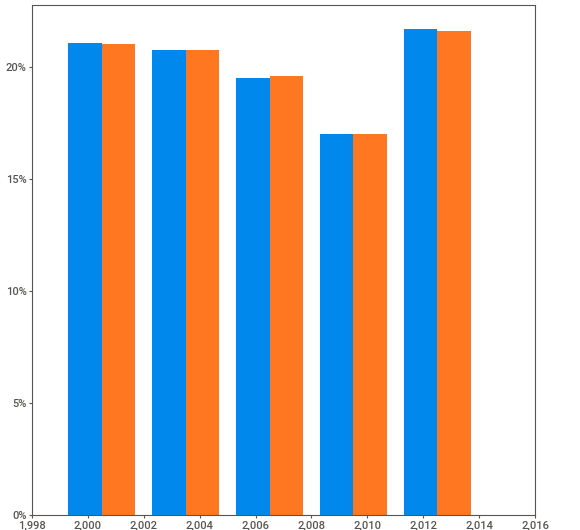
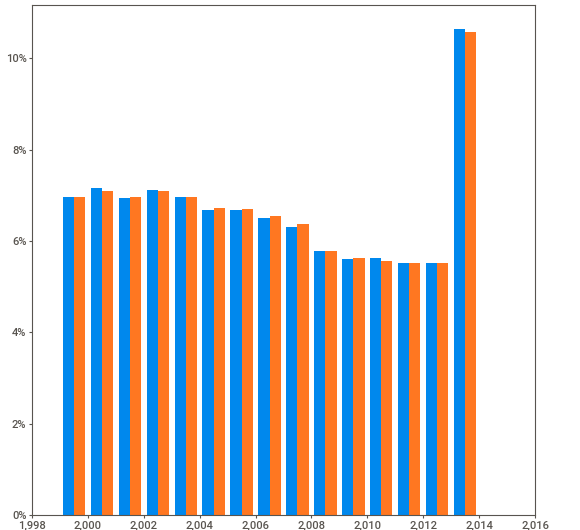
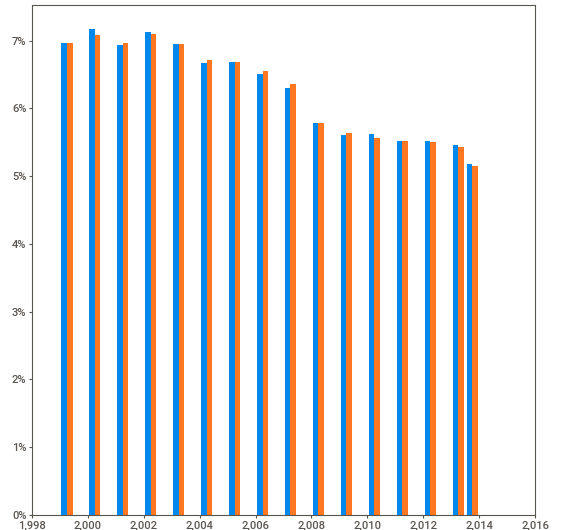
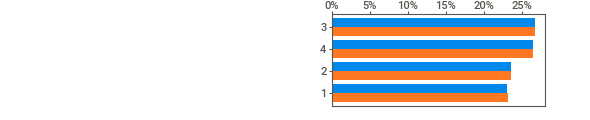
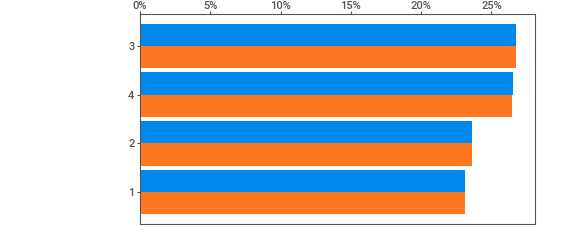
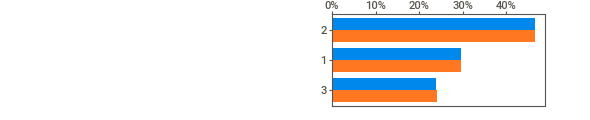
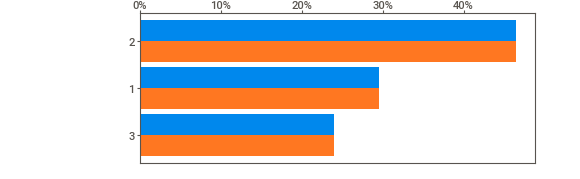
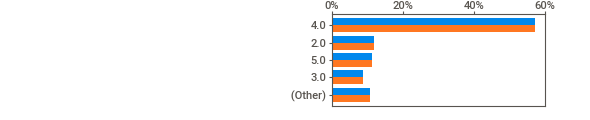
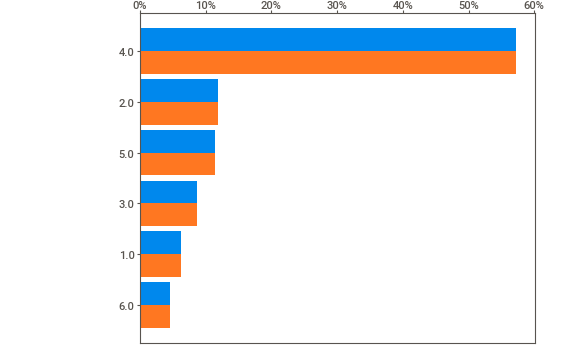
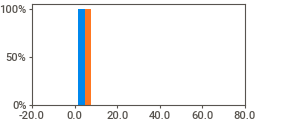
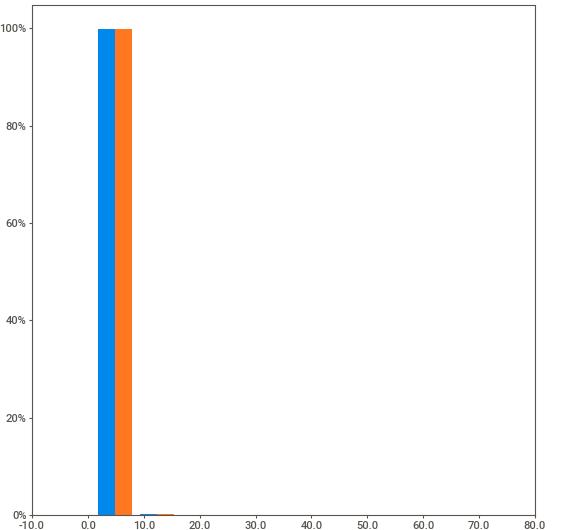
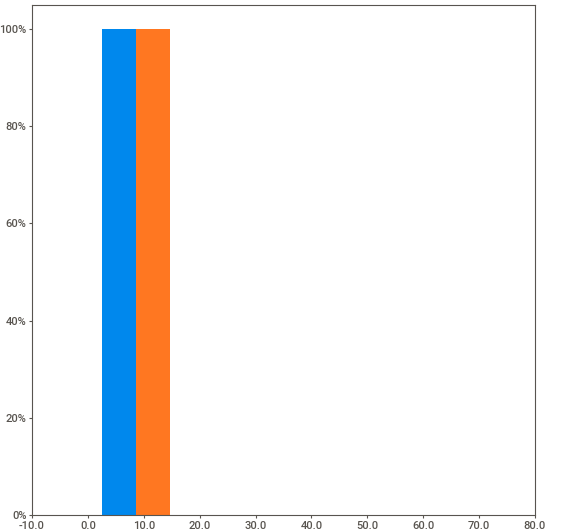
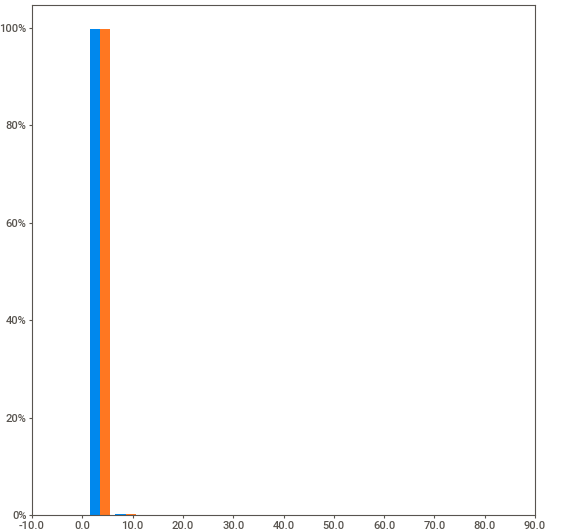
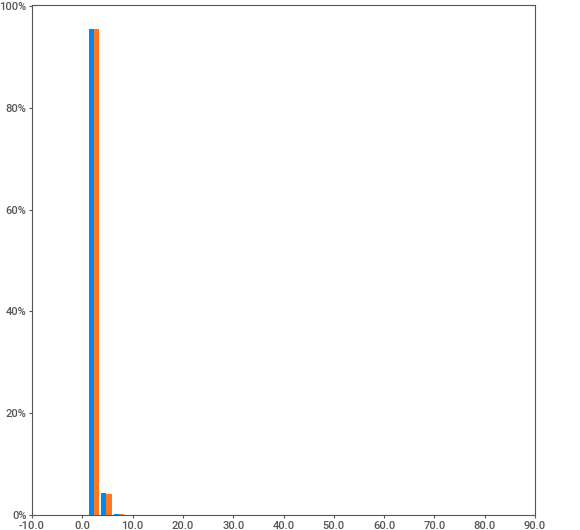
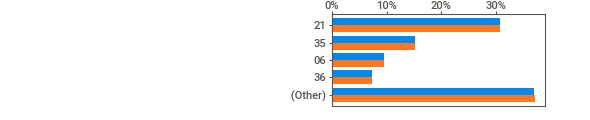
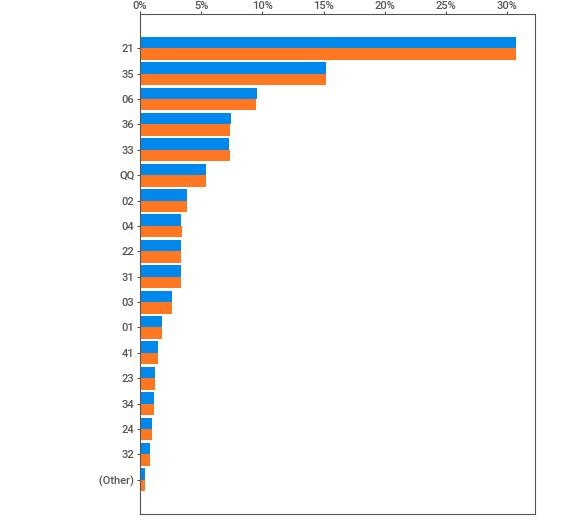
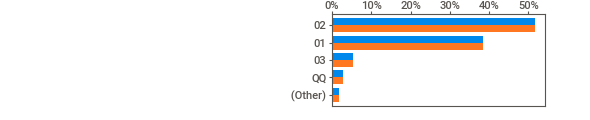
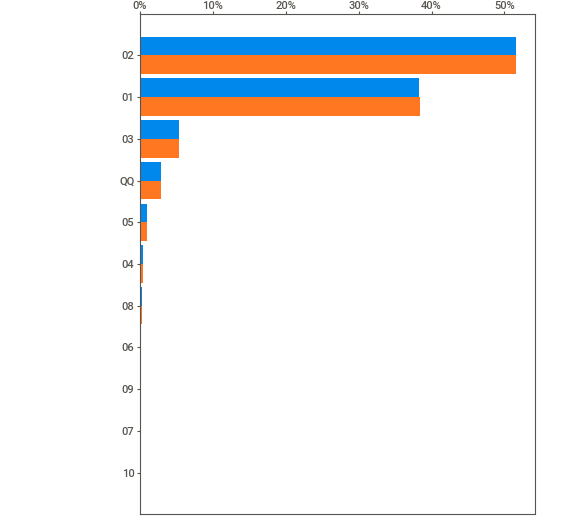
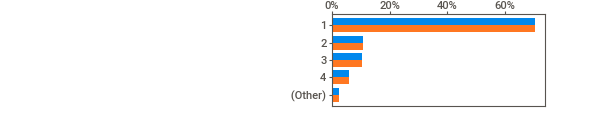
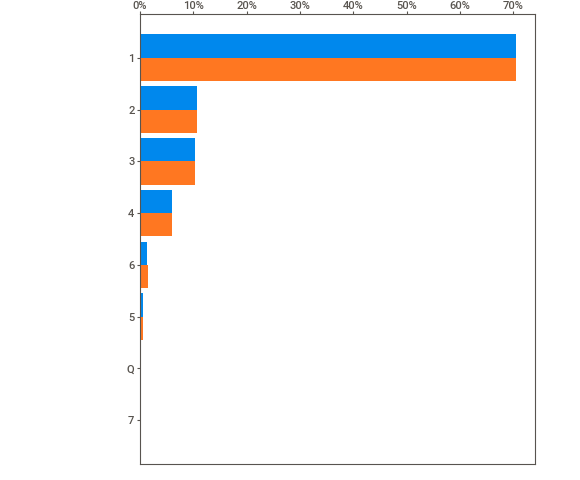
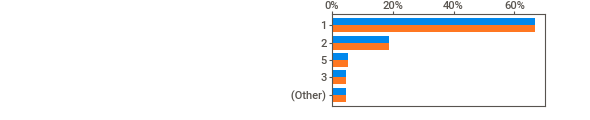
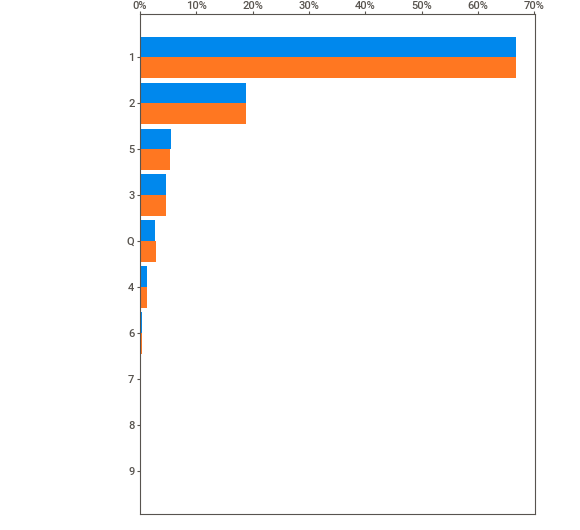
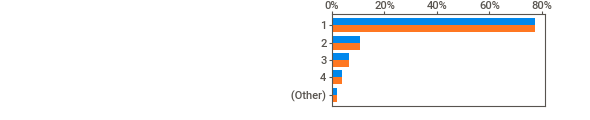
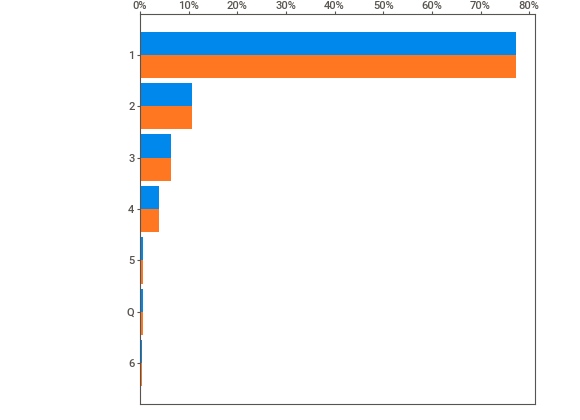
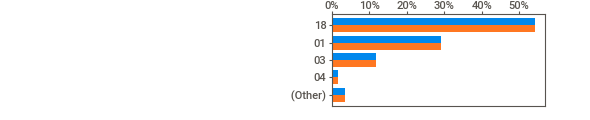
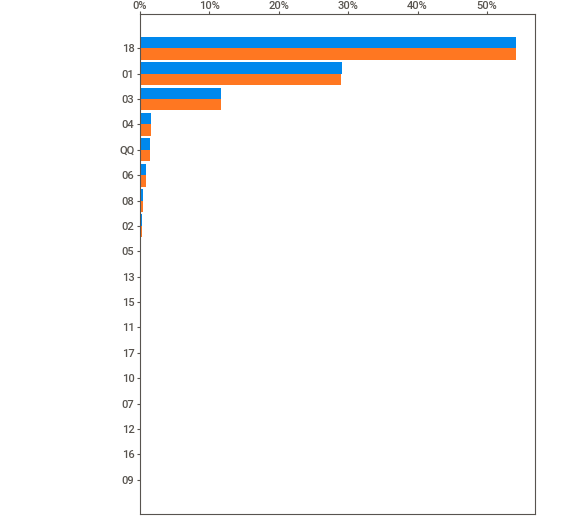
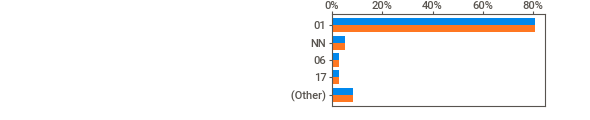
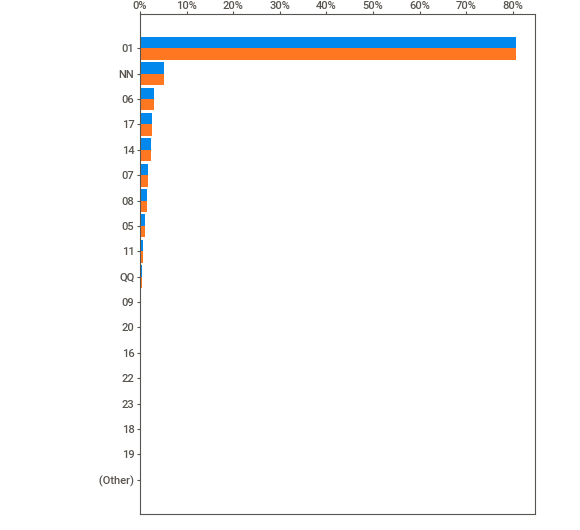
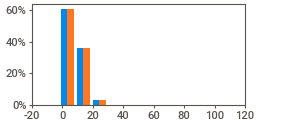
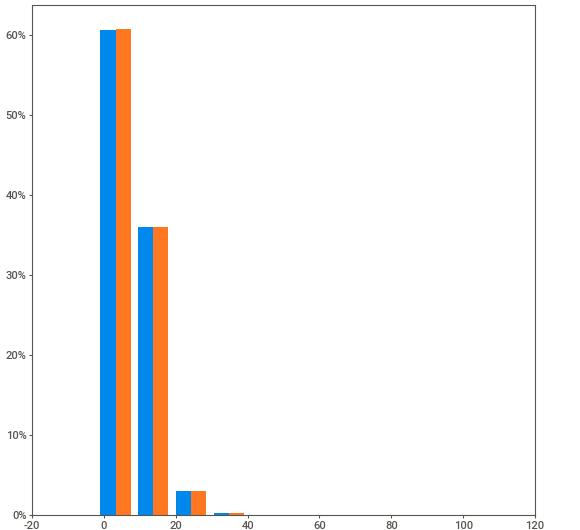
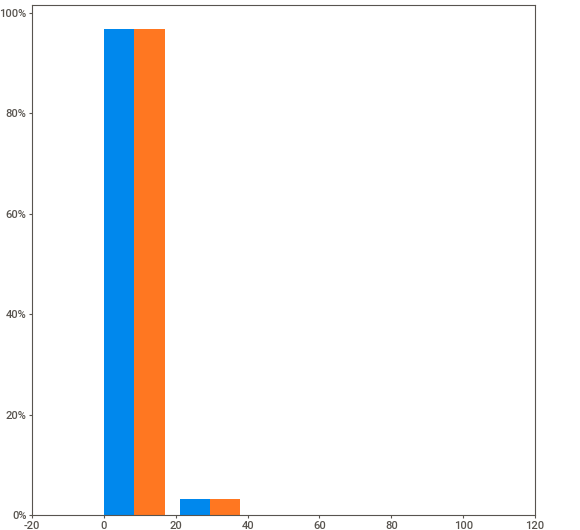
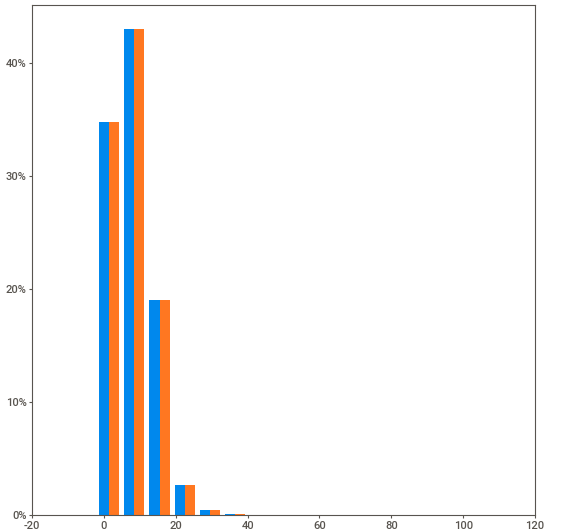
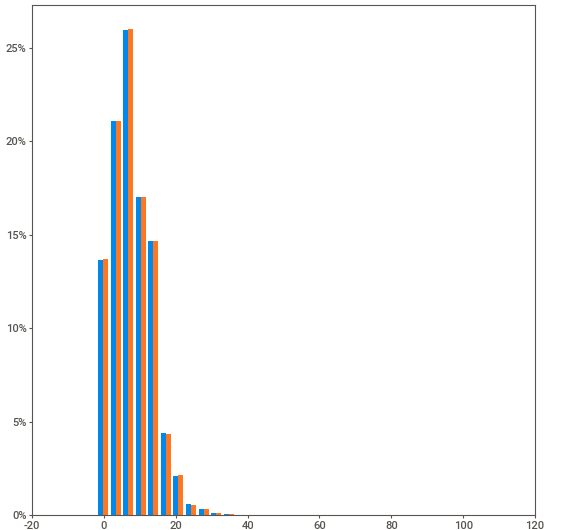
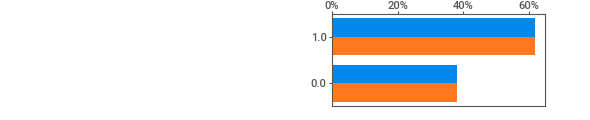
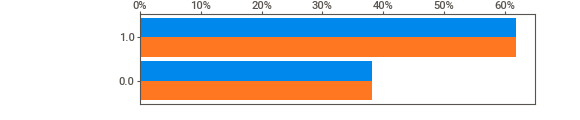
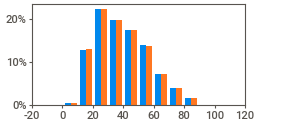
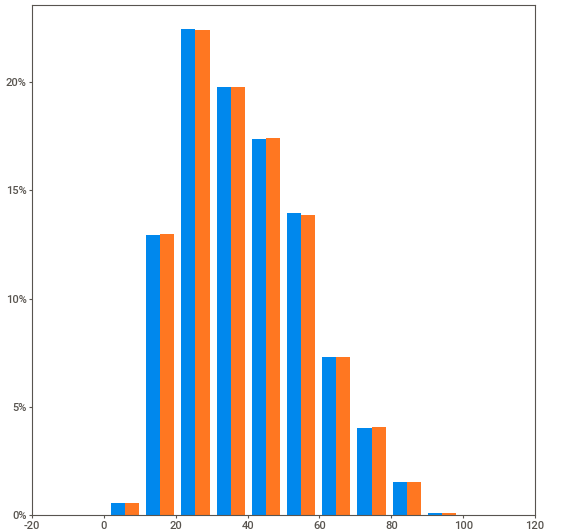
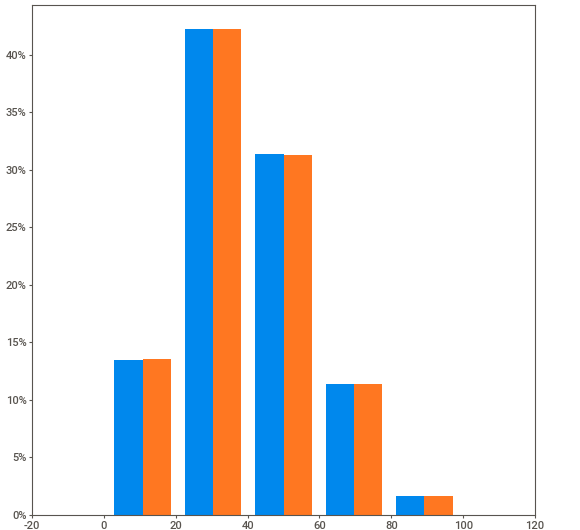
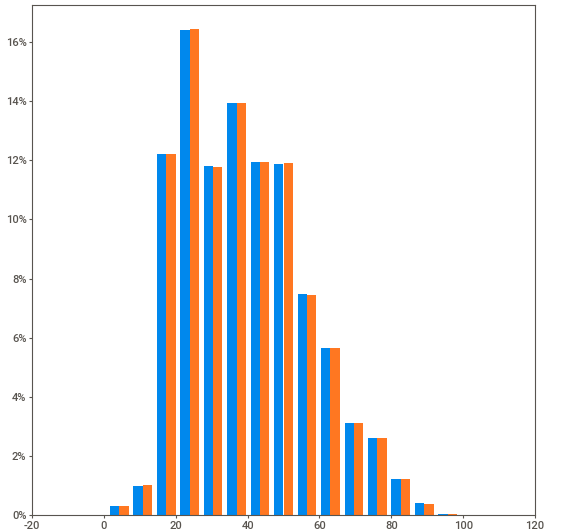
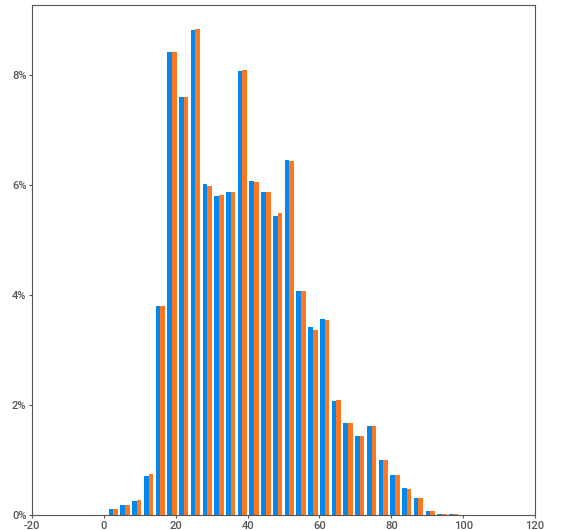
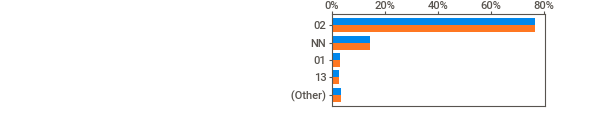
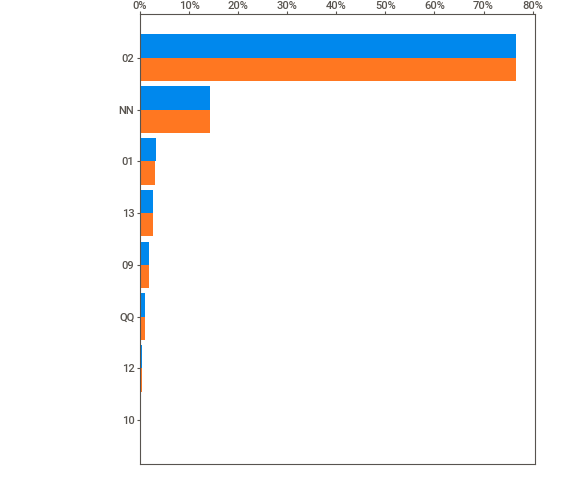
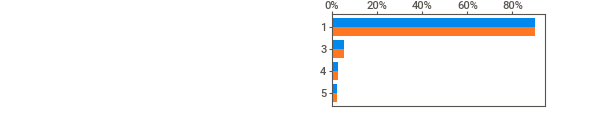
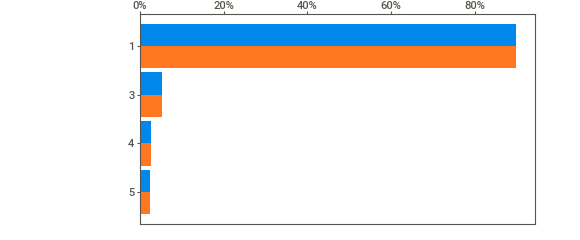
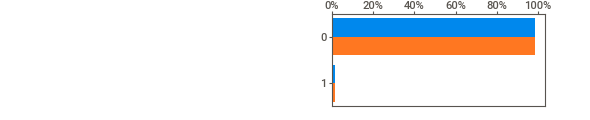
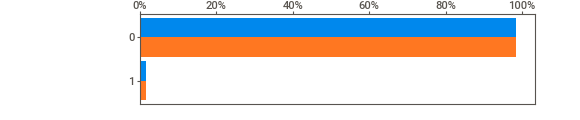
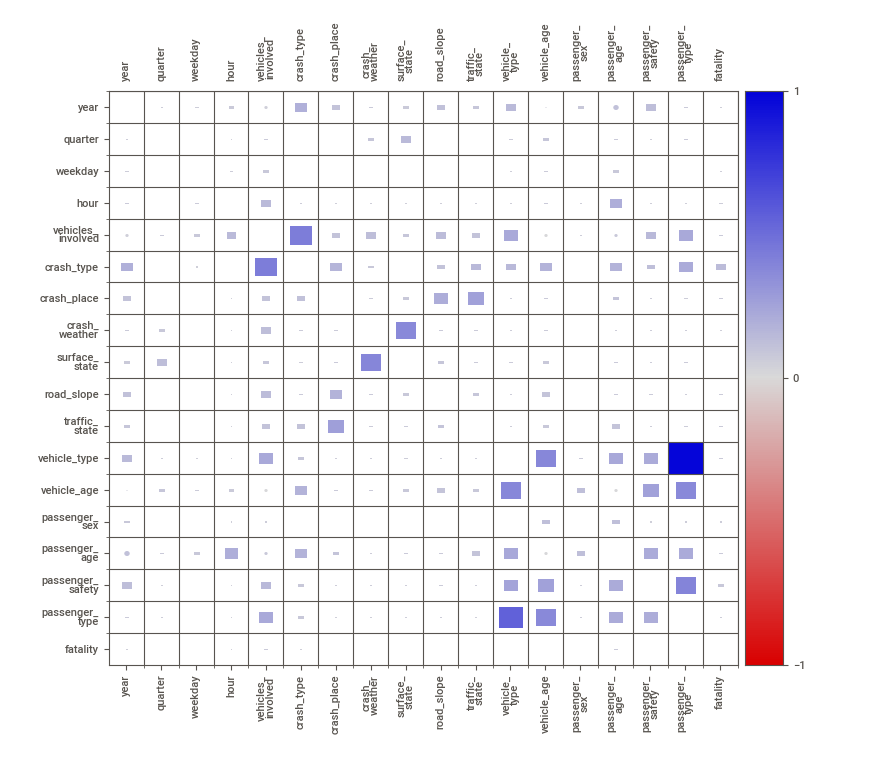
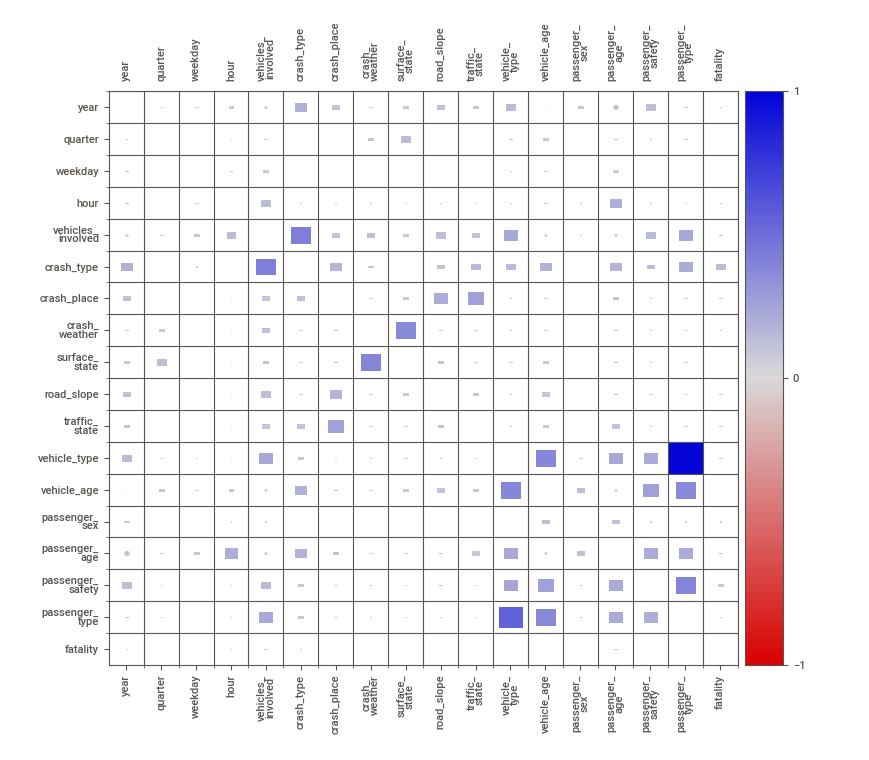

In [16]:
feature_config = sv.FeatureConfig() #,force_text=[""]
my_report = sv.compare([train, "Train"], [test, "Test"], feat_cfg=feature_config)
my_report.show_notebook( 
            layout='widescreen', 
            scale=None)

## Real Data & Synthetic Data Comparison

In [7]:
real_data = test

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)



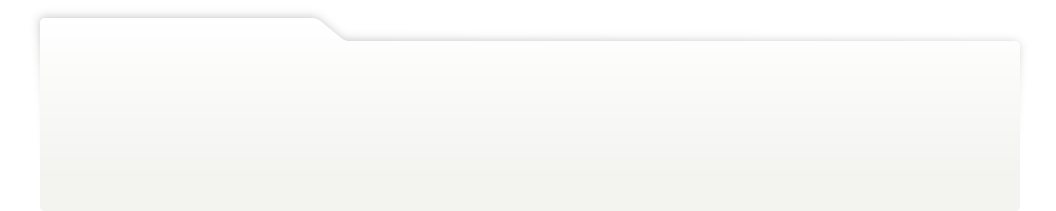
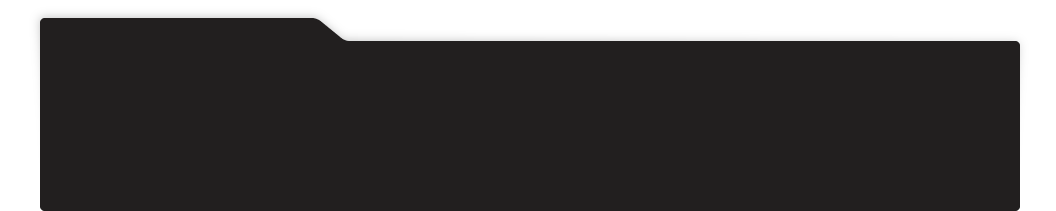
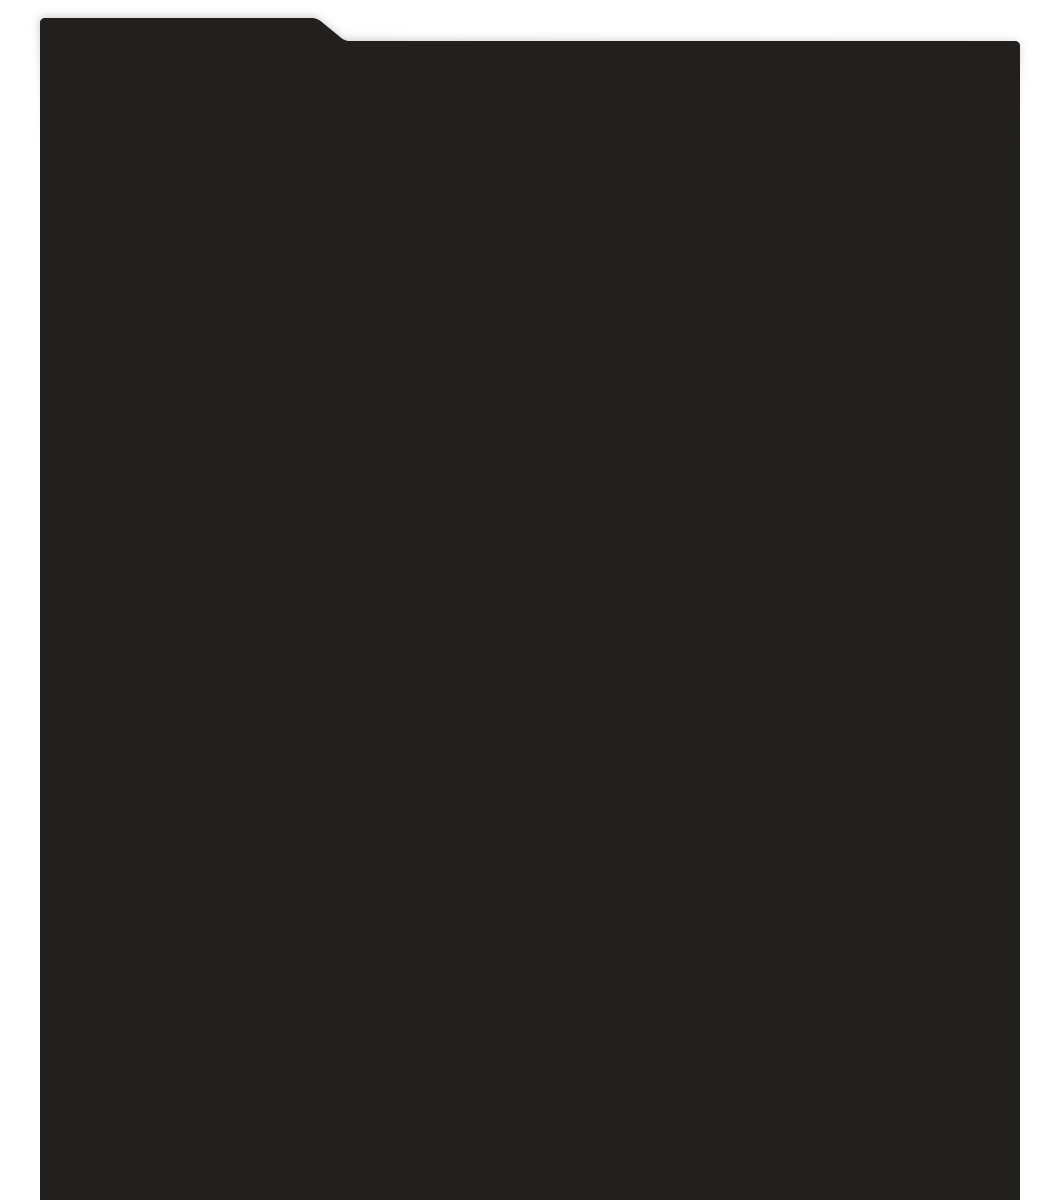
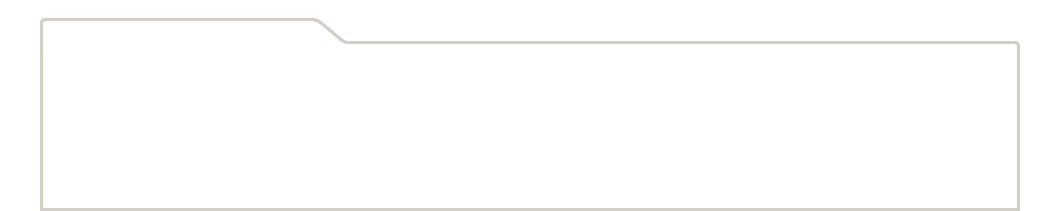
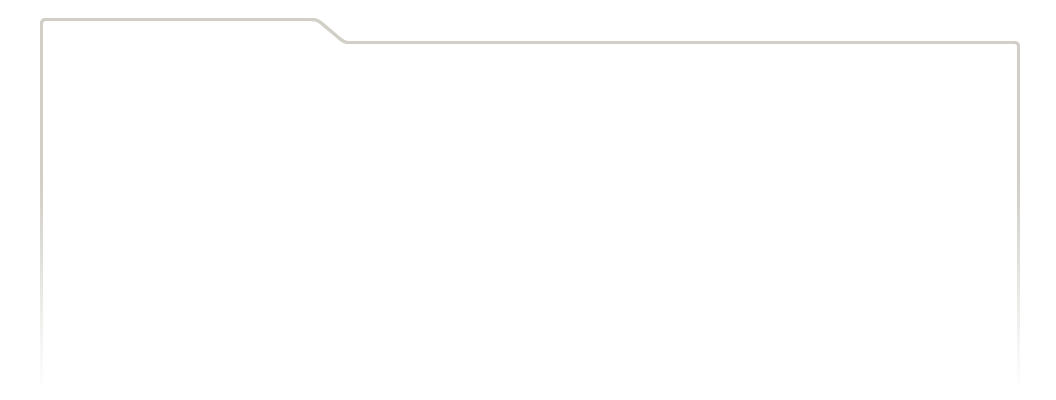
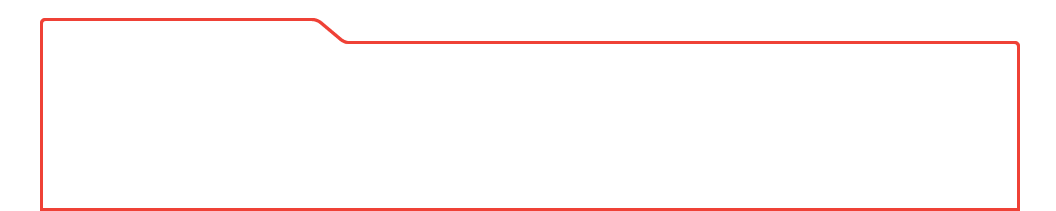
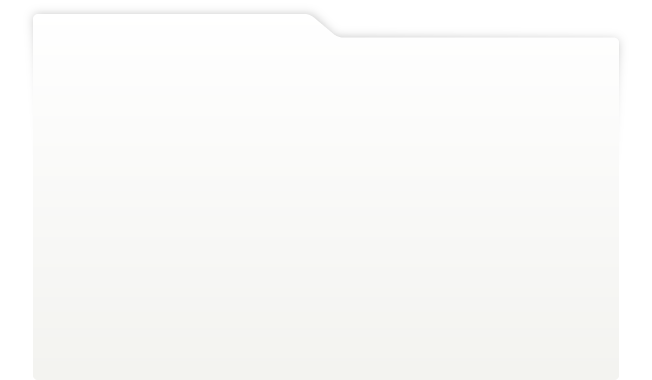
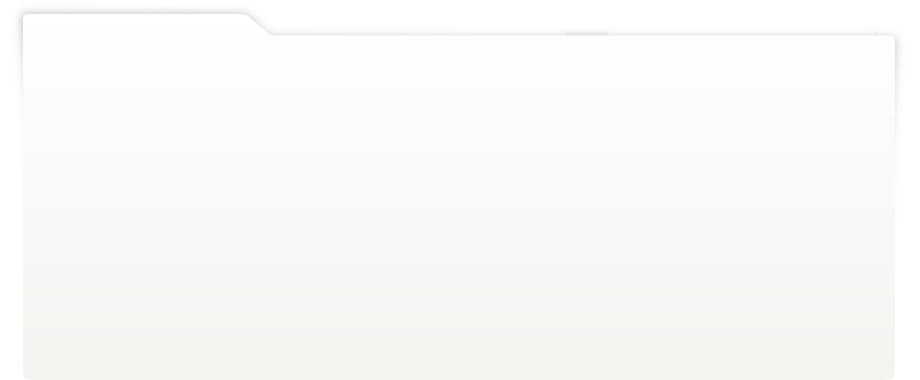
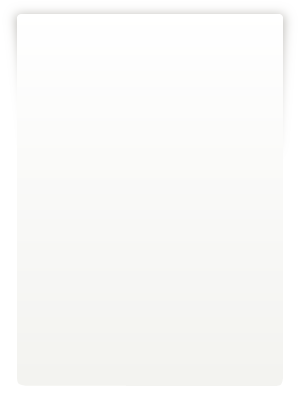
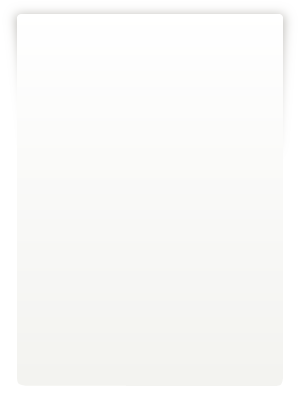
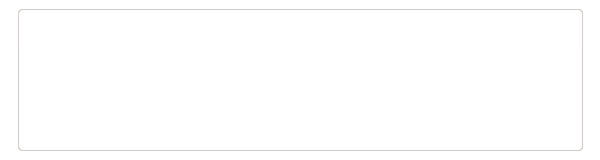
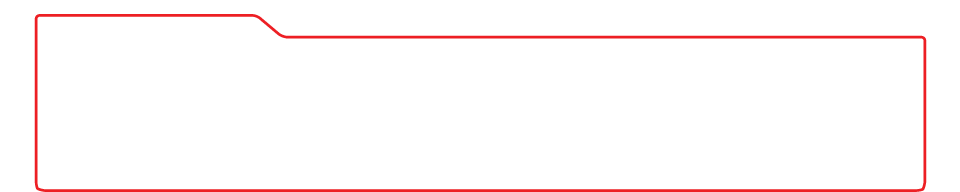
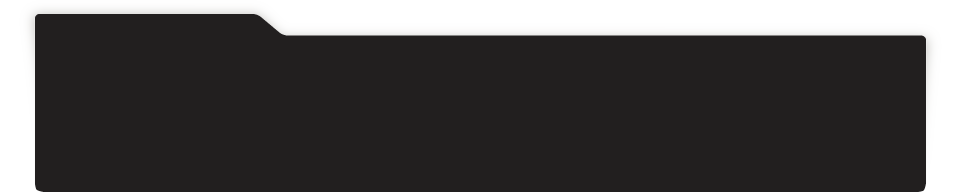
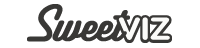
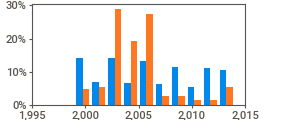
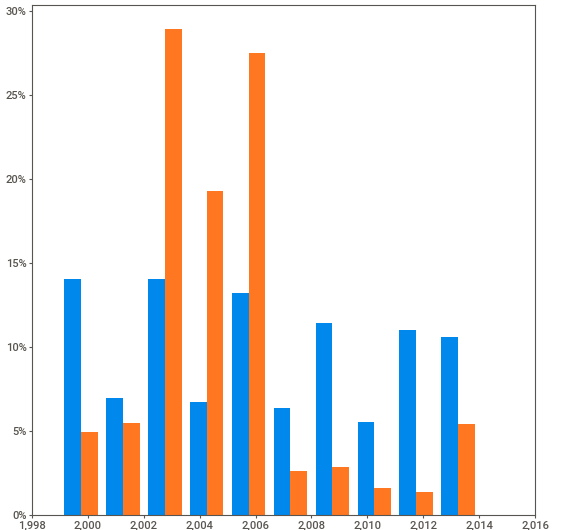
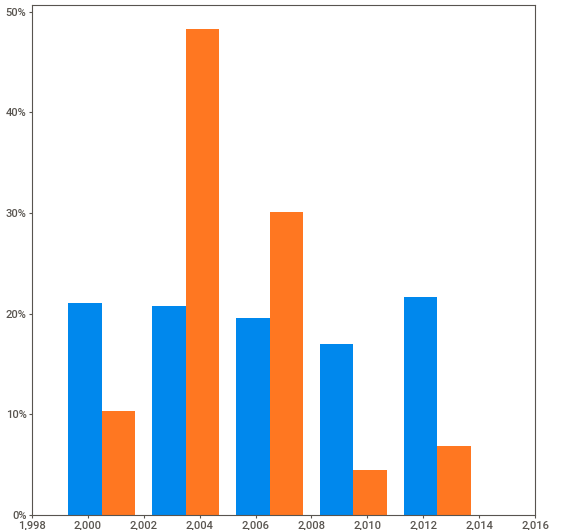
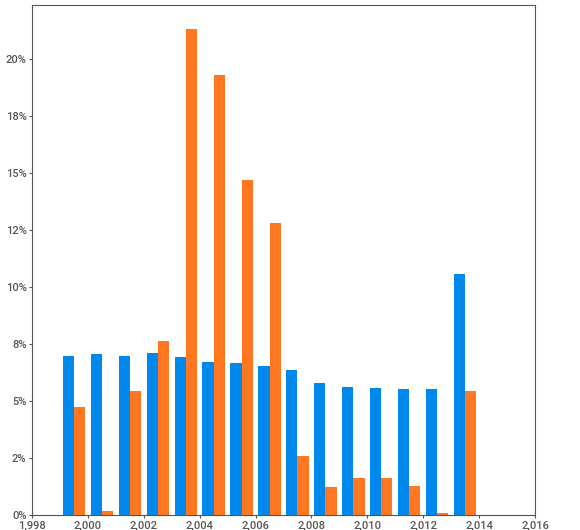
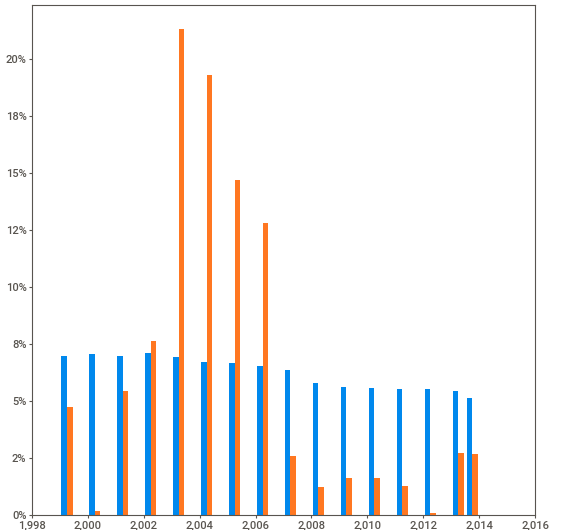
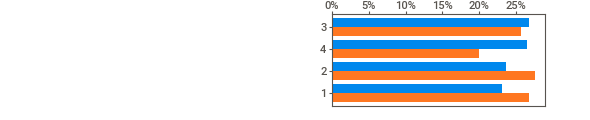
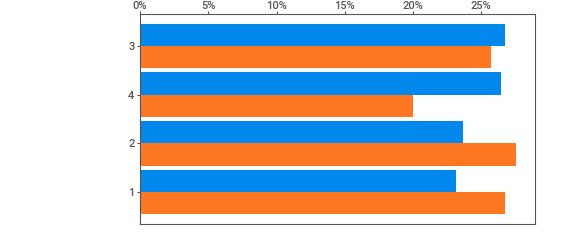
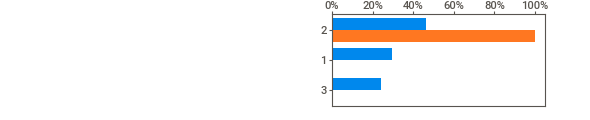
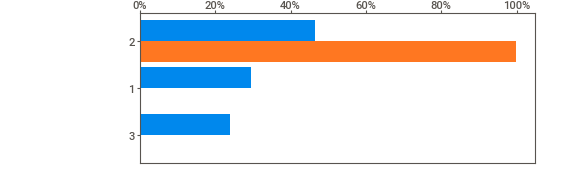
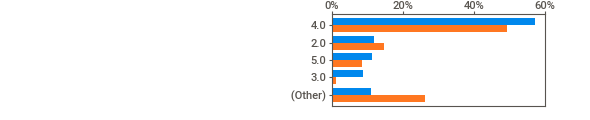
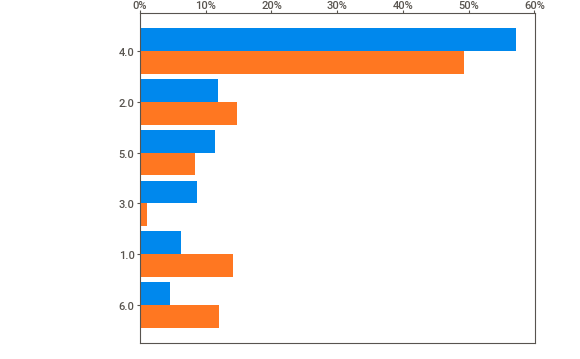
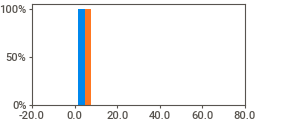
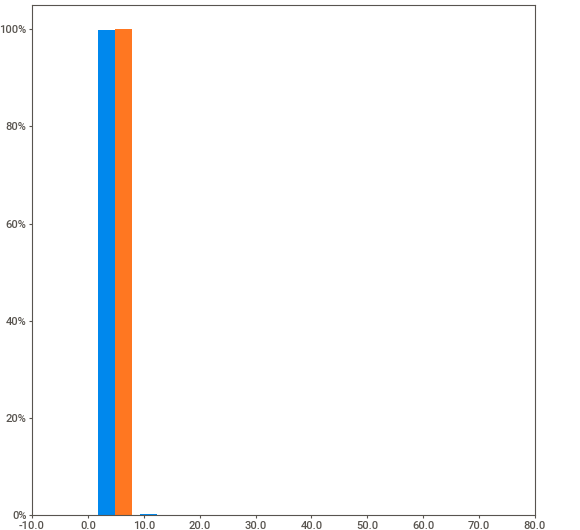
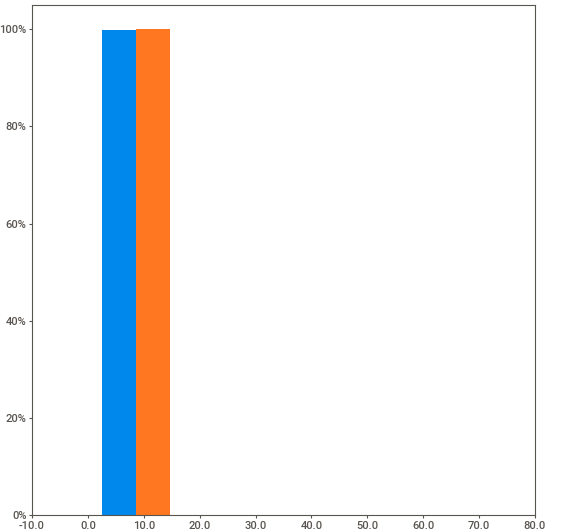
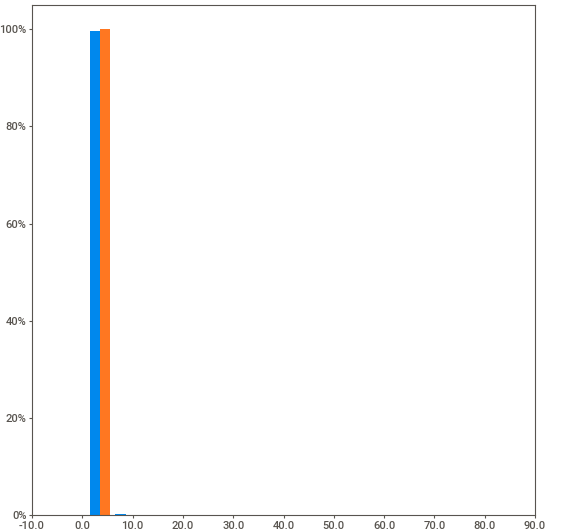
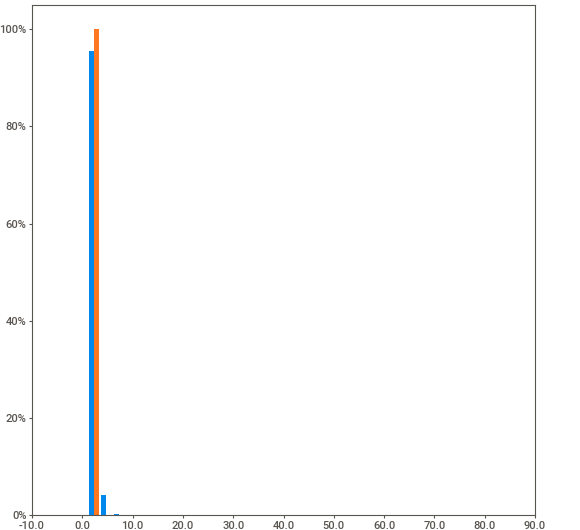
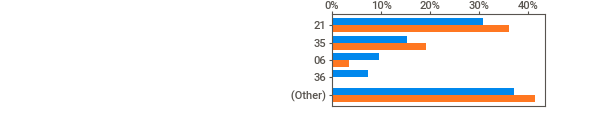
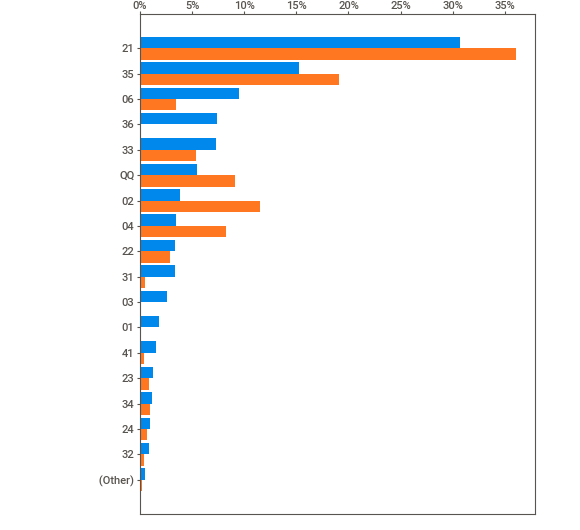
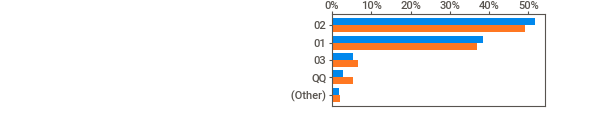
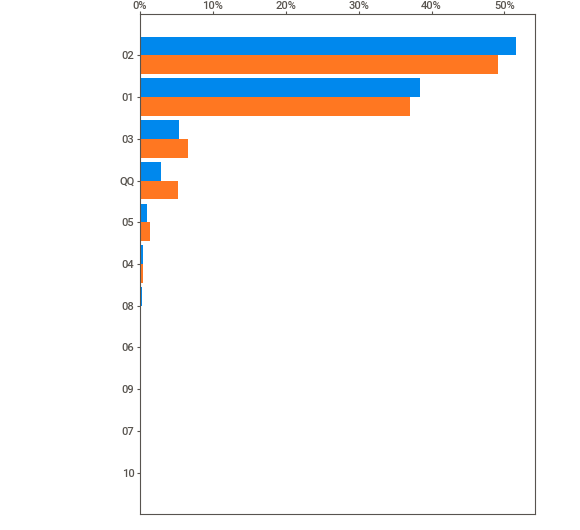
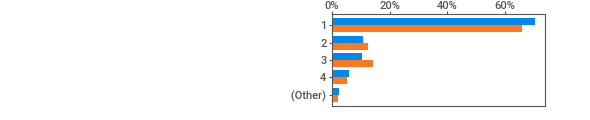
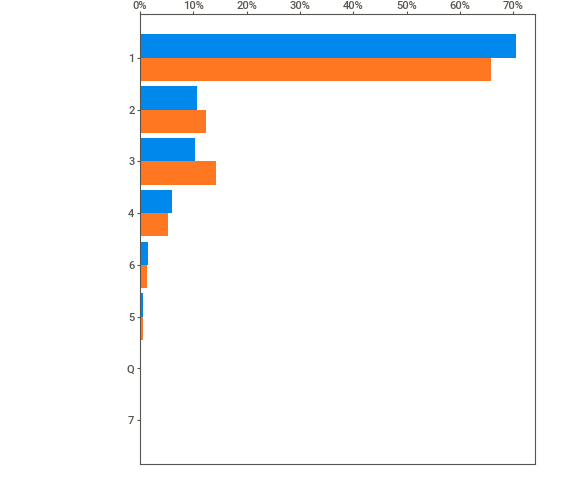
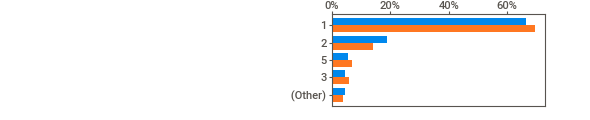
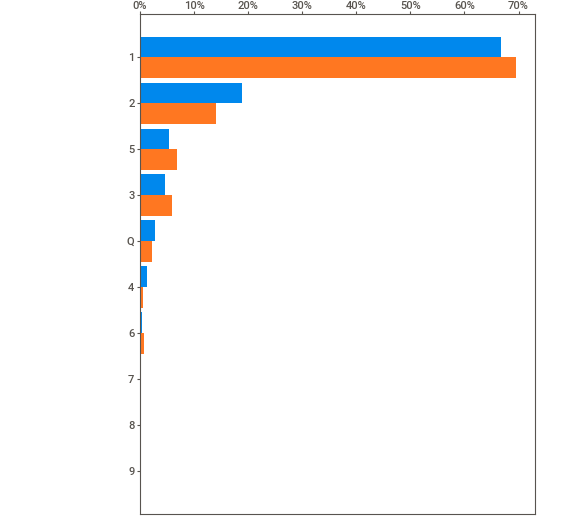
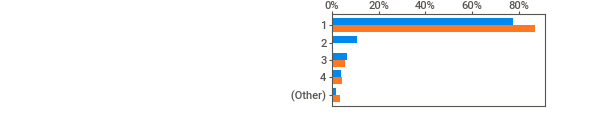
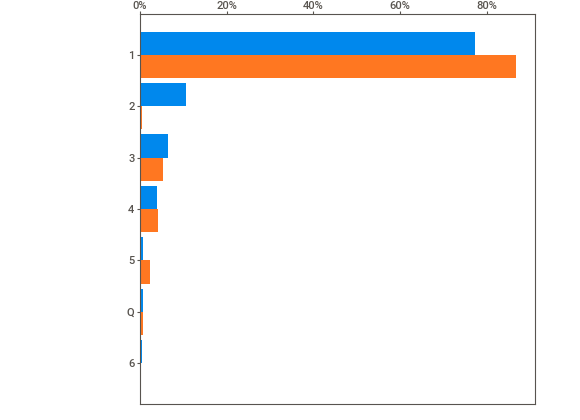
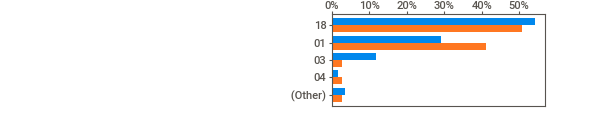
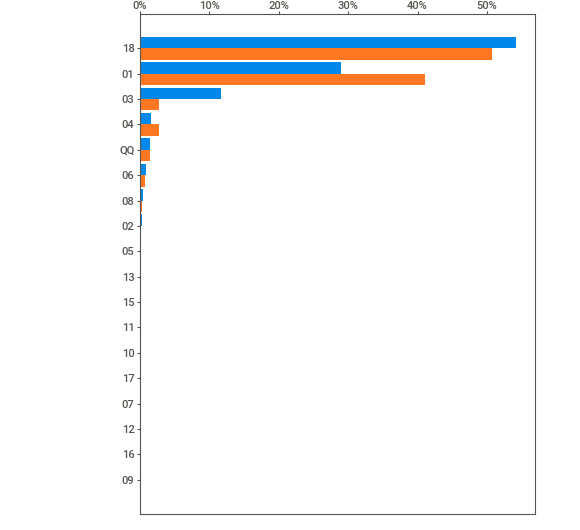
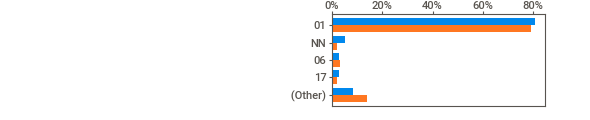
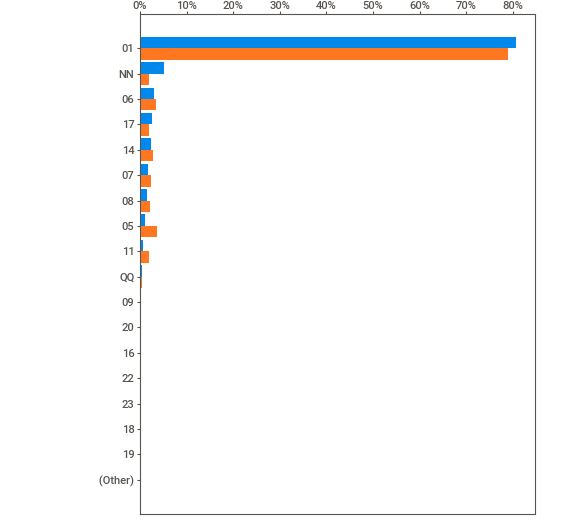
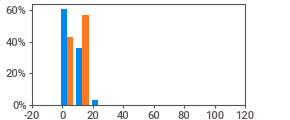
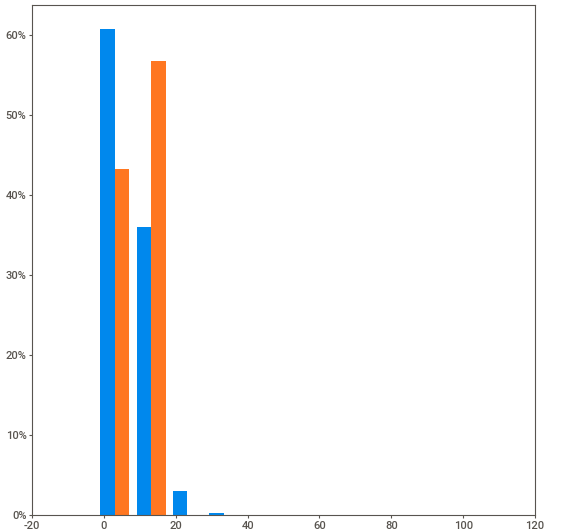
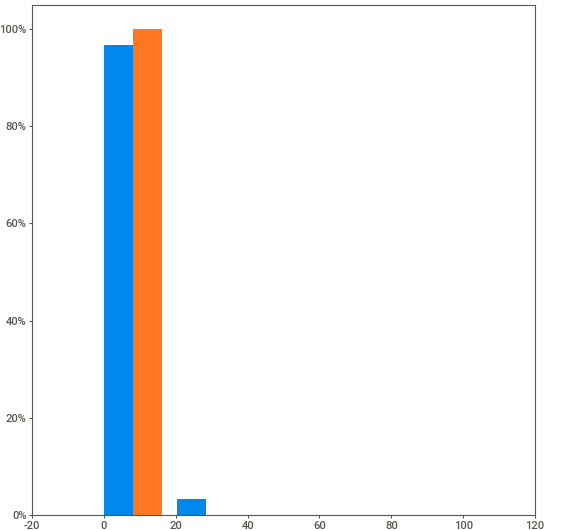
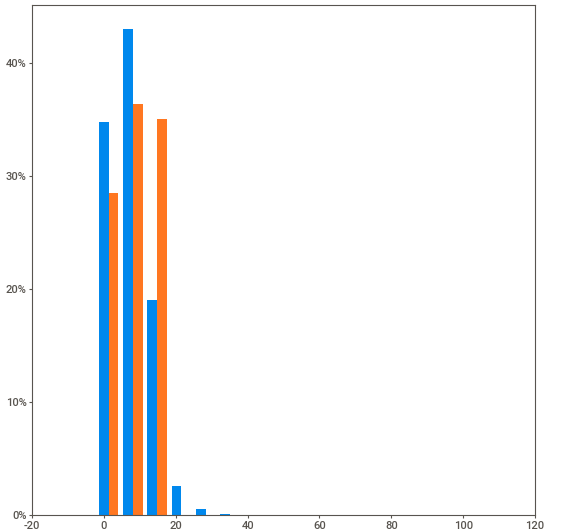
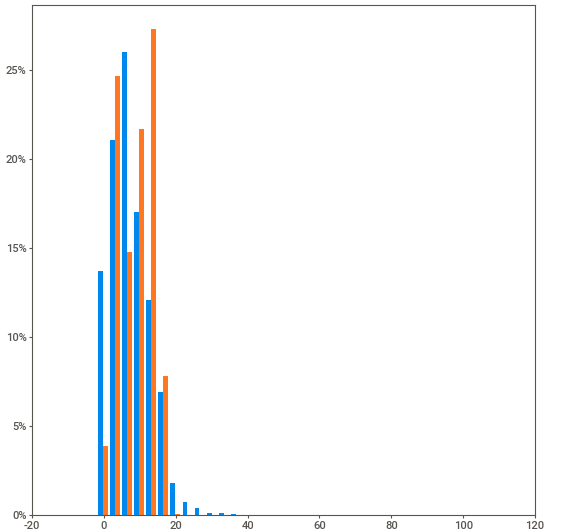
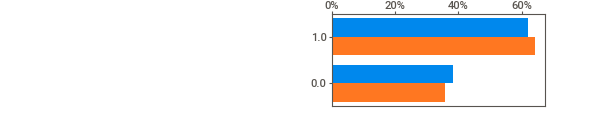
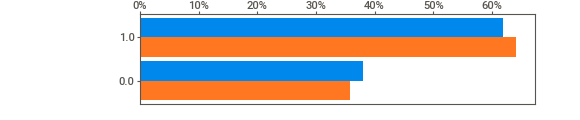
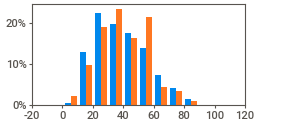
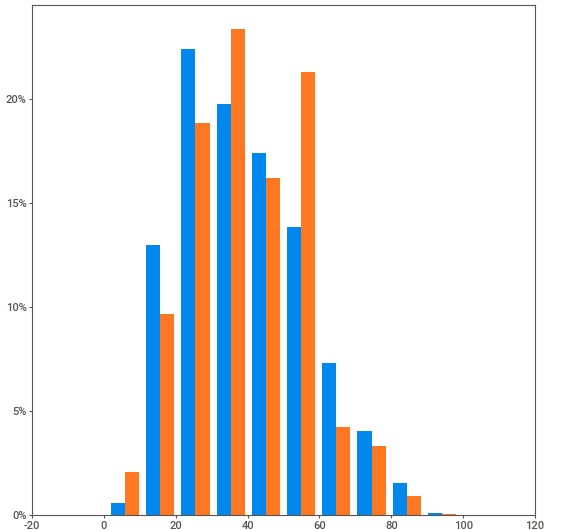
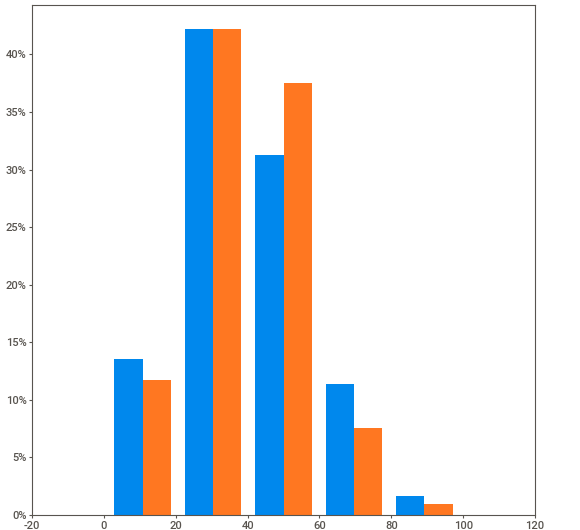
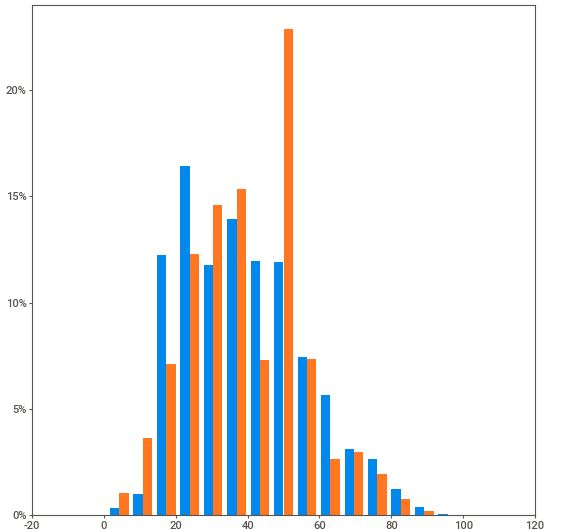
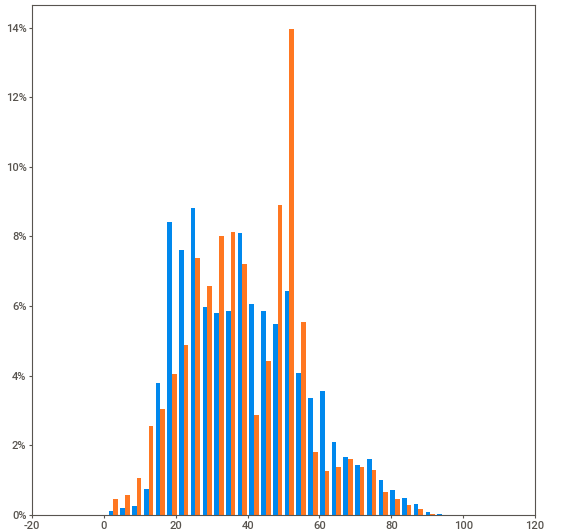
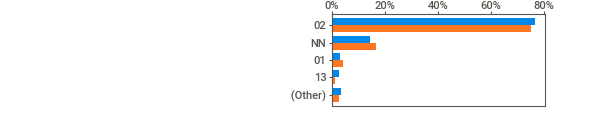
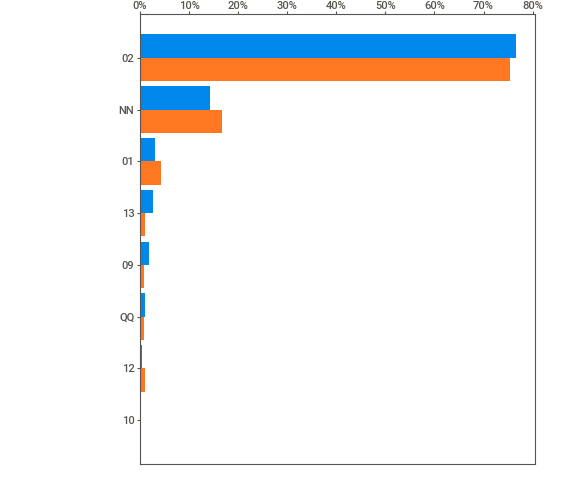
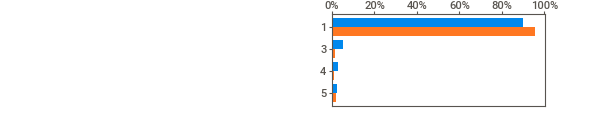
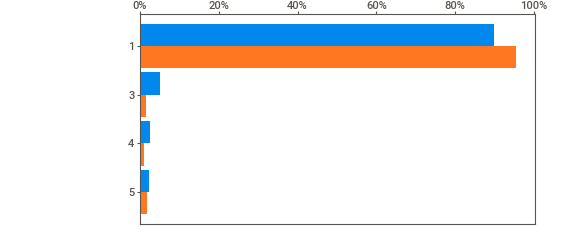
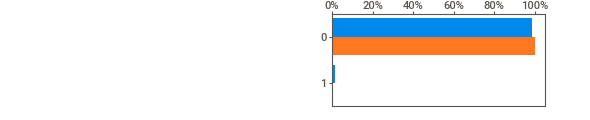
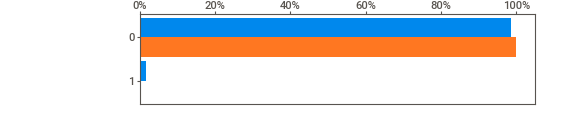
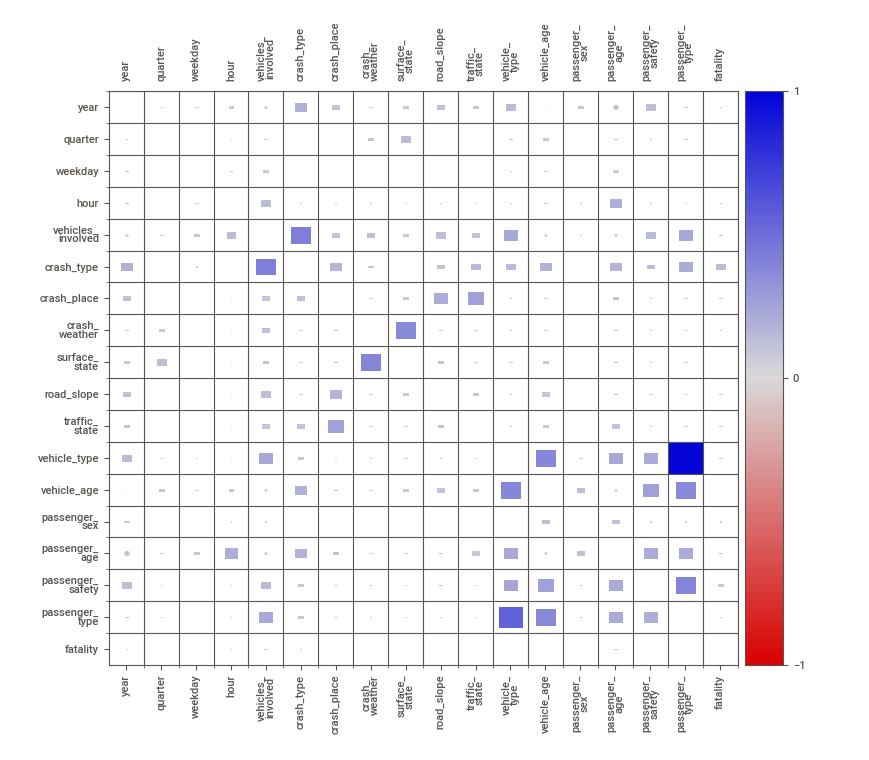
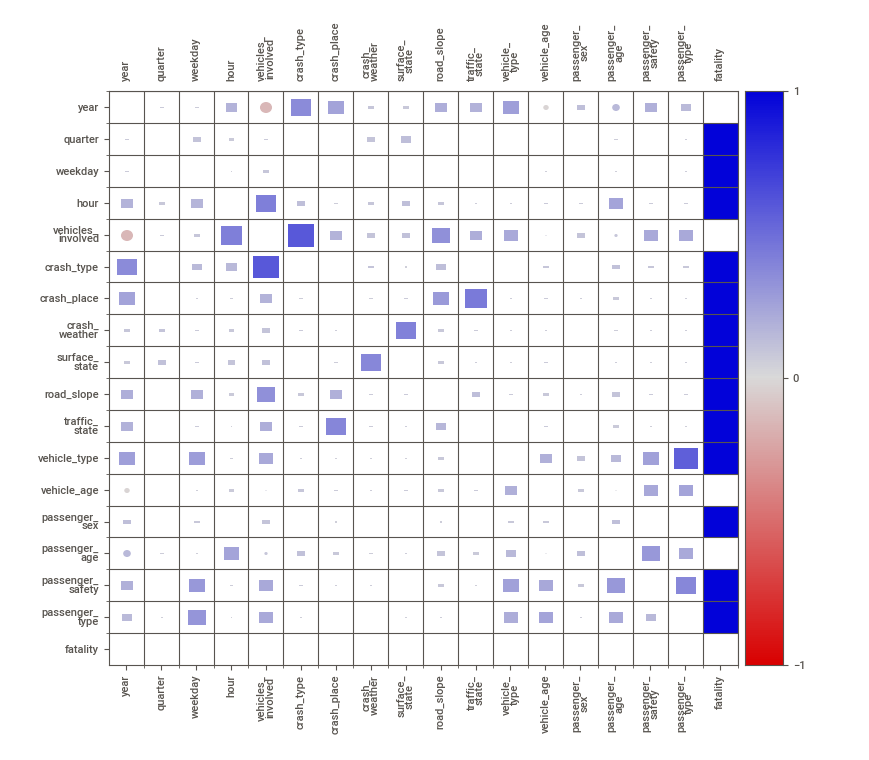

In [19]:
feature_config = sv.FeatureConfig() #,force_text=[""]
my_report = sv.compare([real_data, "Real Data"], [synthetic_data, "Synthetic Data"], feat_cfg=feature_config)
my_report.show_notebook( 
            layout='widescreen', 
            scale=None)

In [5]:
list_cat = ['quarter', 'weekday', 'vehicles_involved', 'passenger_sex', 'passenger_type','crash_type', 'crash_place', 'crash_weather', 'surface_state', 'road_slope', 'traffic_state', 'vehicle_type', 'passenger_safety']

In [8]:
for df in  [synthetic_data,real_data]:
    for col in list_cat:
        df[col] = df[col].astype(str)
        df[col].fillna(value='Nulo', inplace=True)

In [9]:
table_evaluator = TableEvaluator(real_data, synthetic_data,  cat_cols=list_cat)

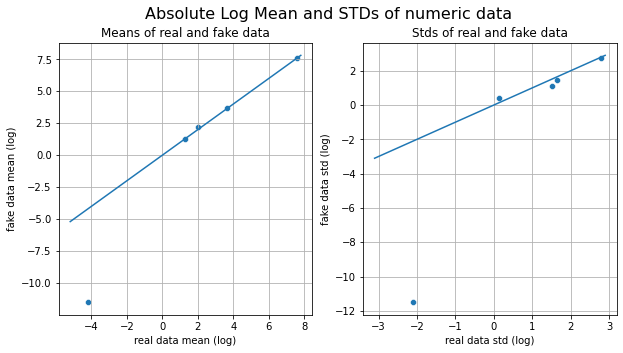

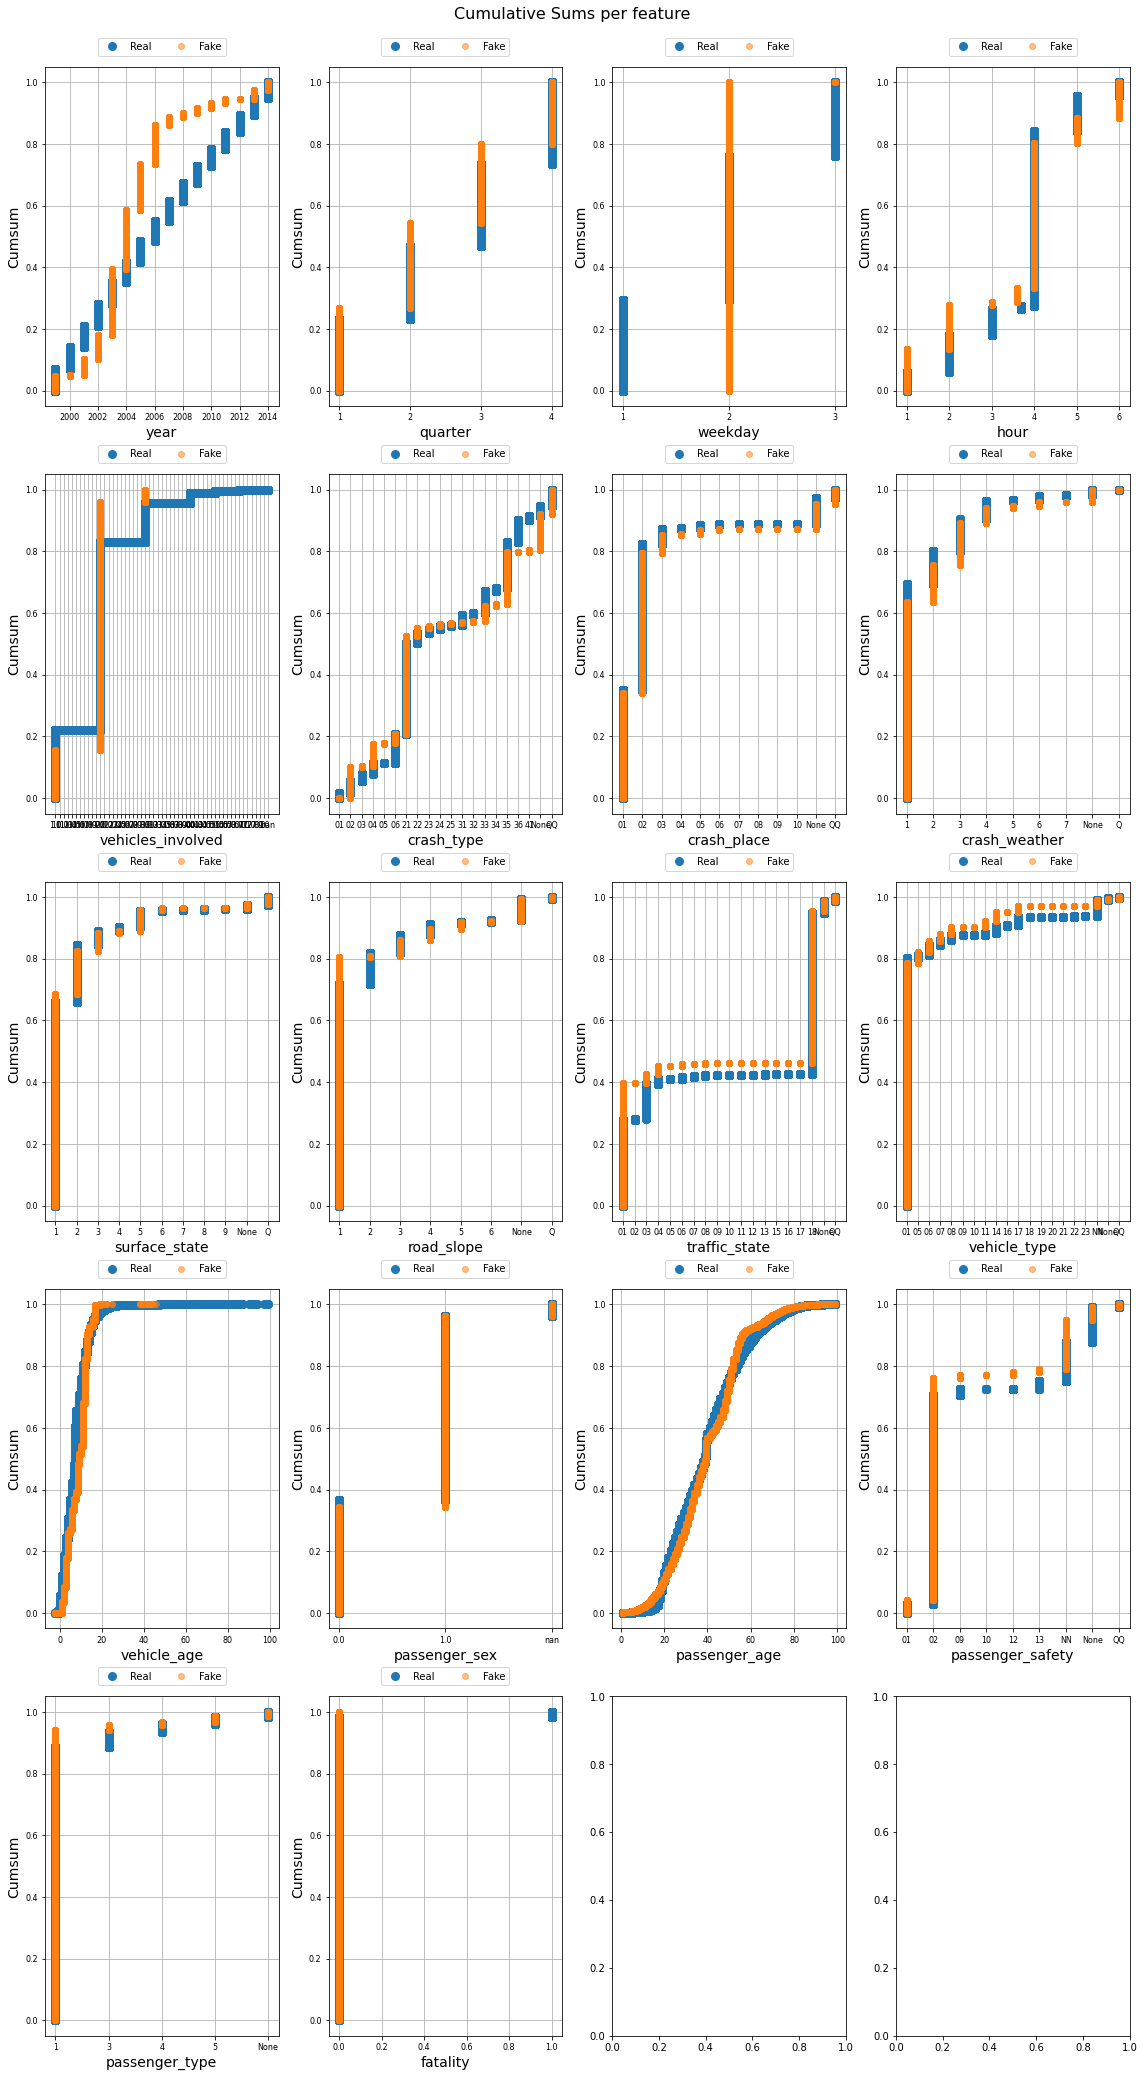

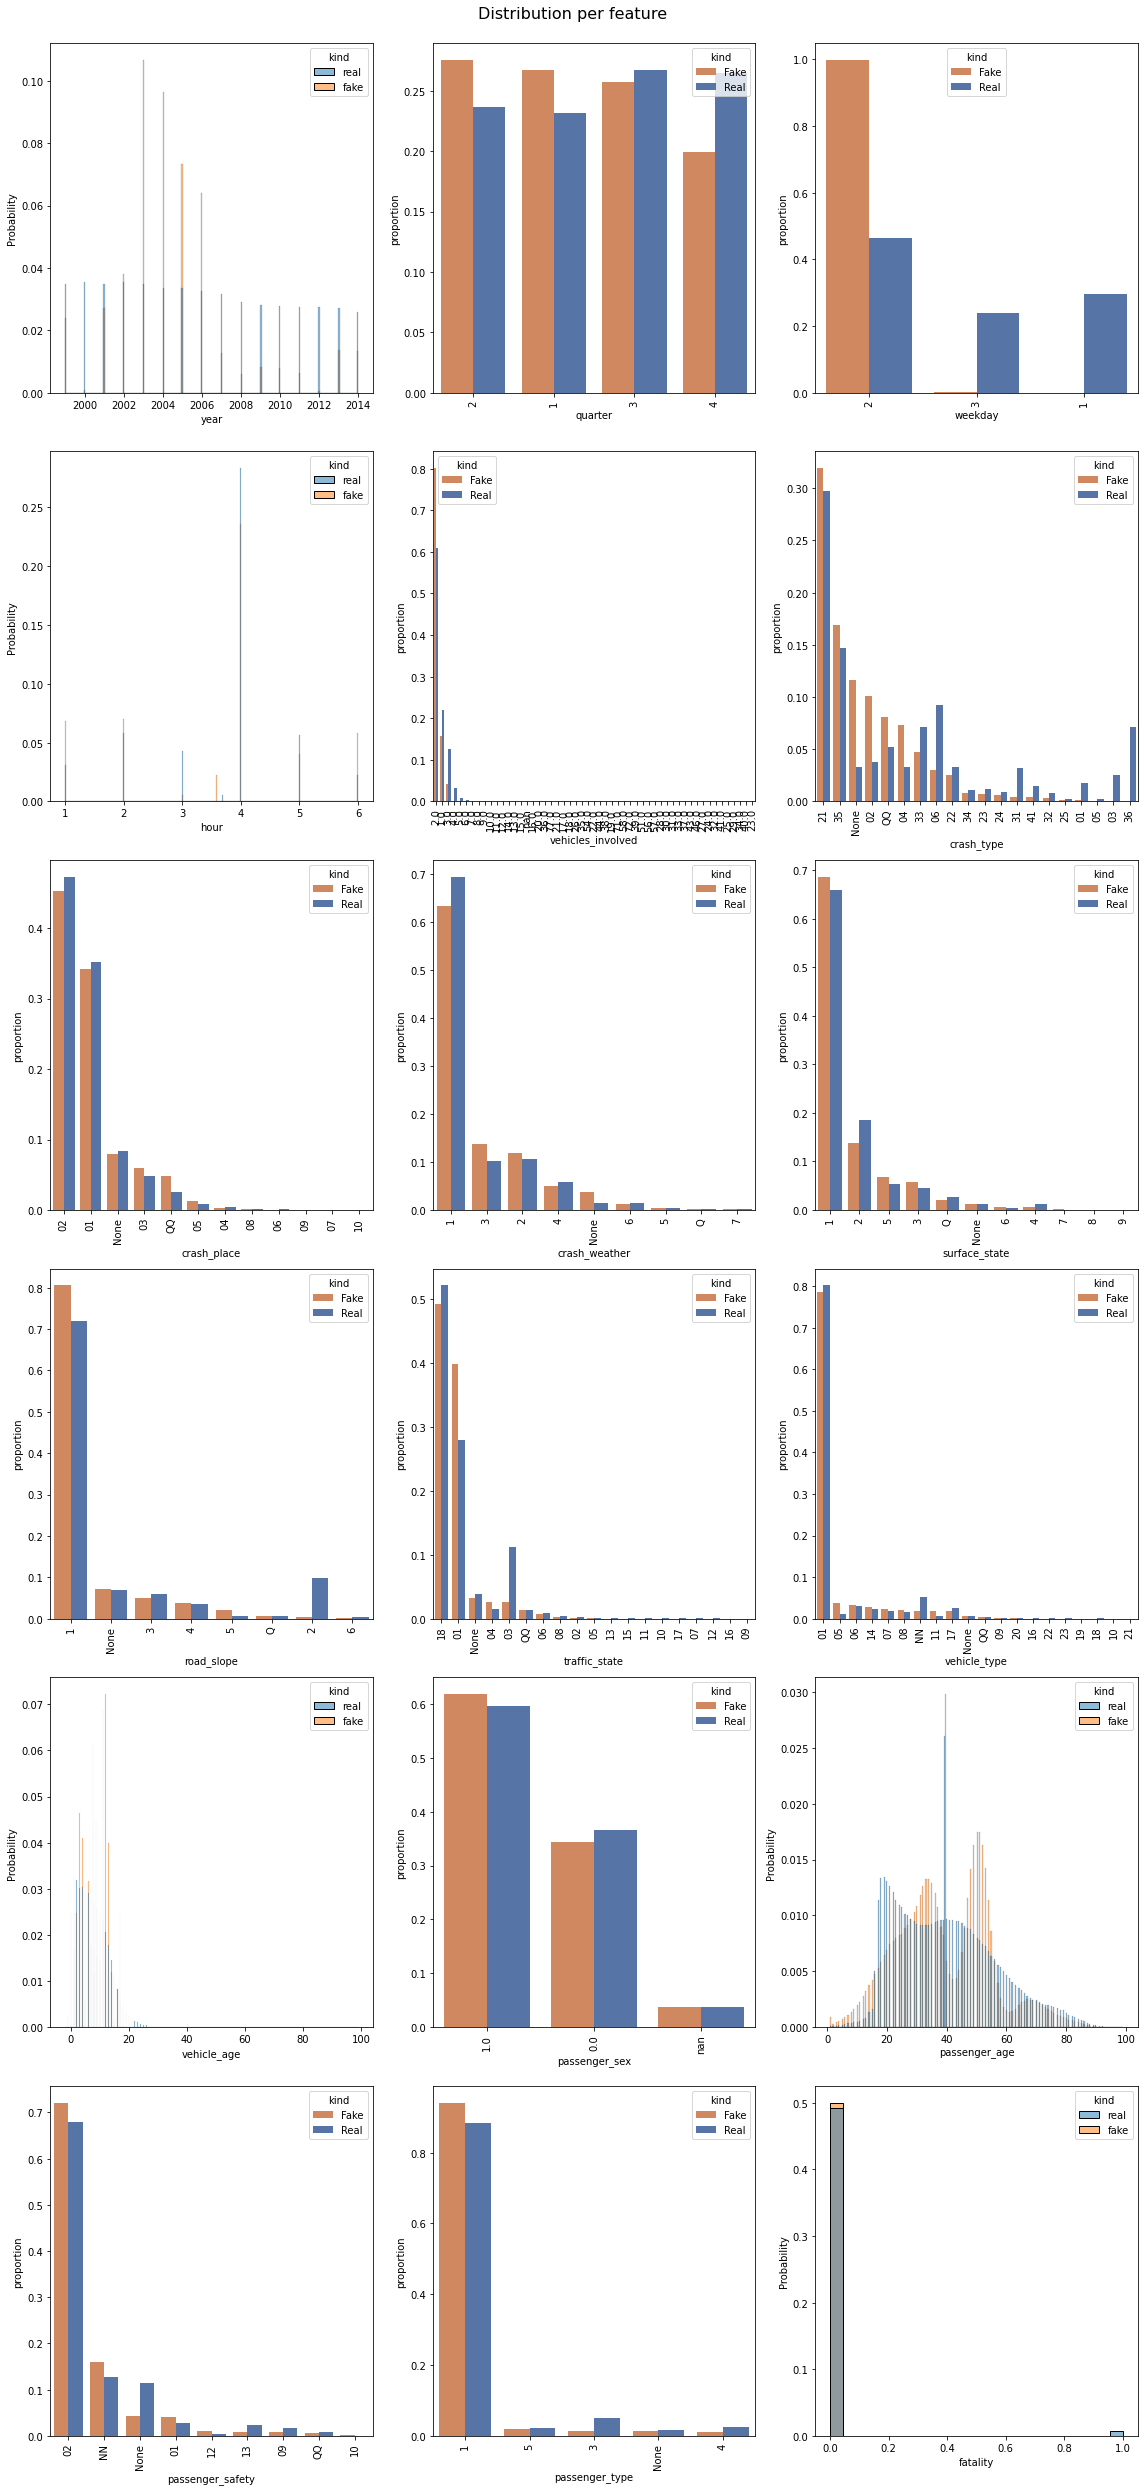

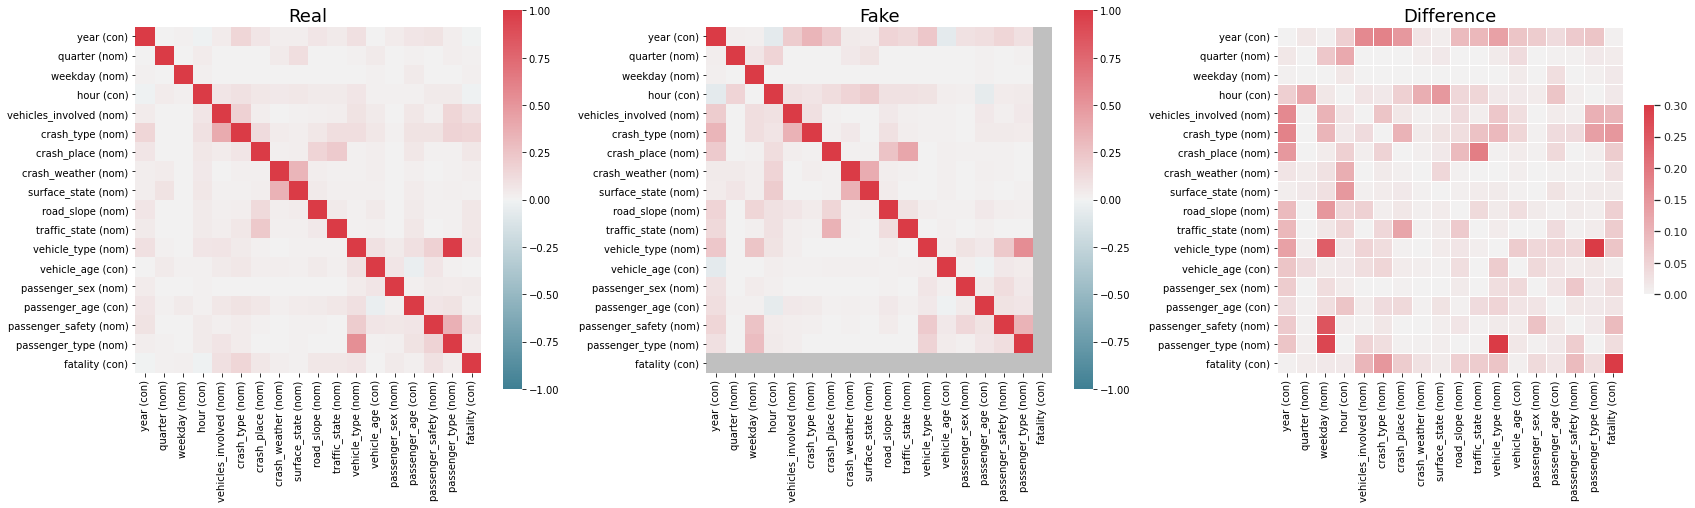

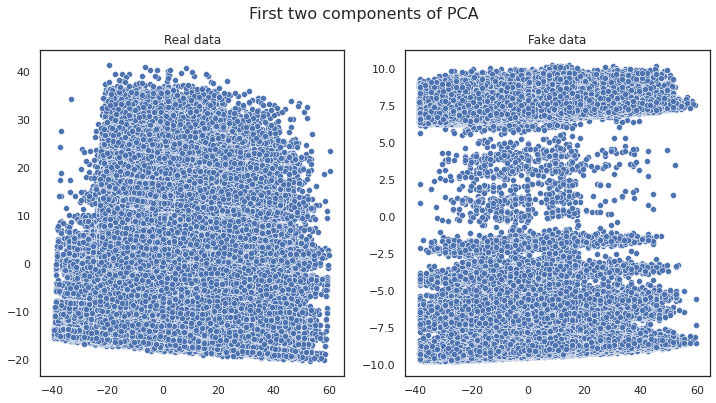

In [10]:
table_evaluator.visual_evaluation()

Podemos descartar este generador sin evaluar más, no ha generado ni una sola muestra donde el target sea 1.